# BUSINESS CASE:- BASED ON THE GIVEN FEATURE OF DATASET WE NEED TO CREATE PREDICTIVE MODEL WHICH GIVES PREDICTION WHETHER AN EMPLOYEE WILL LEAVE THE COMPANY OR NOT.

## IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## LOAD DATA

In [2]:
data=pd.read_csv("HR-Employee-Attrition.csv")
data.head(pd.set_option("display.max_Columns",None))
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [3]:
# Replace special character with NaN
data.replace('[!@#?/]', np.nan, regex=True, inplace=True)
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

## DOMAIN ANALYSIS

**1. AGE:**
-  Age of the employee. This attribute represents the number in years.

**2. ATTRITION:**
- It is the target variable. Indicates whether the employee has left the company (attrition) or not.

**3. BUSINESS_TRAVELS:**
-  Indicates how frequently the employee travels for business purposes.

**4. DAILY_RATE:**
- In HR employee attrition data, the term may refer to the daily rate of employee departures or turnover within an organization.

**5. DEPARTMENT:**
- The department in which the employee works. This attribute identifies the specific organizational unit or division to which the employee is assigned within the company.

**6. DISTANCE_FROM_HOME:**
- The distance of the employee's residence from the workplace. offering insights into commuting patterns and potential impacts on work-life balance.

**7. EDUCATION:**
- The educational level of the employee. This attribute provides information about the highest level of education attained by the employee, serving as a key indicator of their academic qualifications.

**8. EDUCATION_FIELD:**
- The educational background of the employee. This attribute provides insights into the academic qualifications and background of the workforce

**9. EMPLOYEE_COUNT:**
- "Employee count" is the total number of individuals employed by a company.

**10. EMPLOYEE_NUMBER:**
- Employee identification number. This is a unique identifier assigned to each employee for tracking and reference purposes within the organization.

**11. ENVIRONMENT_SATISFACTION:**
- Satisfaction level of the employee with their work environment.measures the degree of contentment or fulfillment an employee experiences in their workplace surroundings, influencing overall job satisfaction.

**12. GENDER:**
- Gender of the employee, categorized as male, female, or other. 

**13. HOURLY_RATE:**
- "DAILY RATE" generally refers to a fixed amount of payment or charge for services, typically calculated on a daily basis.

**14. JOB_INVOLVEMENT:**
- Level of involvement or engagement in the job.This attribute gauges the extent to which an employee is actively participating and engaged in their assigned tasks or responsibilities, influencing overall job performance and satisfaction.

**15. JOB_LEVEL:**
- The hierarchical level or rank of the employee's job.This attribute indicates the position's seniority within the organizational structure.

**16. JOB_ROLE:**
- The specific job role or position of the employee.

**17. JOB_SATISFACTION:**
- Satisfaction level of the employee with their job. It measures the overall contentment or happiness an employee derives from their job, reflecting their perception of the work itself and its alignment with their expectations.

**18. MARITAL STATUS:**
- Marital status of the employee, indicating whether they are married, single, or possibly other marital statuses.

**19. MONTHLY_INCOME:**
- The total amount of money an employee earns on a monthly basis.

**20. MONTHLY_RATE:**
- The specific amount an employee is paid per month, which may include base salary and fixed allowances, excluding variable components like bonuses.

**21. NUM_COMPANIES_WORKED:**
- The number of companies the employee has worked for.It provides information about the employee's career history and the extent of their experience in various organizations prior to their current position.

**22 OVER_18:**
- "Over18" is a binary indicator in HR data, typically denoting whether an employee is 18 years of age or older.

**23. OVER TIME:**
- Indicates whether the employee works overtime or not. 

**24. PERCENT_SALARY_HIKE:**
- Percentage increase in the employee's last salary hike.compensation trends and reward structures within the organization.

**25. PERFORMANCE_RATING:**
- The performance rating assigned to the employee. It measure of their achievements and contributions within a given evaluation period.

**26. RELATIONSHIPS_SATISFACTION:**
- Satisfaction level of the employee with their work relationships.

**27. STANDARD_HOURS:**
- The predetermined or standard number of hours considered as a full workday within a specific organization.

**26. STOCK_OPTION_LEVEL:**
- "Stock Option Level" signifies the extent or tier of stock options granted to an employee as part of their compensation package.

**27. TOTAL_WORKING_YEARS:**
- The total work experience of the employee in years.It provides an overview of the cumulative professional experience of the employee, including all previous roles and positions held.

**28. TRAINING_TIMES_LAST_YEAR:**
- The number of times the employee received training in the last year.

**29. WORK_LIFE_BALANCE:**
- Evaluation of work-life balance for the employee.It assesses the employee's perception and satisfaction regarding the balance between their professional responsibilities and personal life, which can impact overall job satisfaction and well-being.

**30. YEARS_AT_THIS_COMPANY:**
- Number of years the employee has worked at the current company. It indicating the length of their service within the organization.

**31. YEARS_IN_CURRENT_ROLE:**
- Number of years the employee has been in the current role. It specifically measures the duration the employee has spent in their present position within the organization.

**32. YEARS_SINCE_LAST_PROMOTION:**
- Number of years since the employee's last promotion. It indicates the time elapsed since the employee received their last promotion.

**33. YEARS_WITH_CURRENT_MANAGER:**
- Number of years the employee has been with the current manager. It measures the duration of the working relationship between the employee and their current manager. team stability and leadership continuity.

## BASIC CHECKS

In [4]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [5]:
data.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  \
1465            2061                        3   Male          41   
1466            2062                        4   Male          42   
1467            2064                        2   Male          87   
1468            2065                        4   Male          63   
1469            2068                        2   Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1465       Married           2571        12290                   4      Y   
1466       Married           9991        21457                   4      Y   
1467       Married           6142         5174                   1      Y   
1468       Married           5390        13243                   2      Y   
1469       Married           4404        10228                   2      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1465       No                 17                  3                         3   
1466       No                 15                  3                         1   
1467      Yes                 20                  4                         2   
1468       No                 14                  3                         4   
1469       No                 12                  3                         1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1465             80                 1                 17   
1466             80                 1                  9   
1467             80                 1                  6   
1468             80                 0                 17   
1469             80                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2

In [6]:
data.shape

(1470, 35)

- The dataset contain 1470 observation with 35 feature.

In [7]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

- Total 35 feature is present in the dataset including target variable i.e Attrition

In [8]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### NUMERICAL FEATURES

In [10]:
num_data=data.select_dtypes(include=["int64","float64"])
num_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### CATEGORICAL FEATURES

In [11]:
cat_data=data.select_dtypes(include="O")
cat_data.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

### UNIQUE CATEGORICAL FEATURES

In [12]:
for i in cat_data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print("----------------------")

Attrition ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------------
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------
Department ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------------
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
----------------------
Gender ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
----------------------
JobRole ['Sales Executive' 'Research Scientist' 'Labor

### STATISTICAL REPORT FOR NUMAERICAL COLUMNS

In [13]:
data.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

#### OBSERVATION/INSIGHTS

**AGE:**
- Average age: 37 years
- Range: 18 to 60 years
- Most employees fall between 30 and 43 years old.

**DAILY_RATE:**
- Average daily rate: 802
- Range: 102 to 1499

**DISTANCE FROM HOME:**
- Average distance: 9-10 units from the workplace
- Range: 1 to 29 units
- Majority live within 2-14 units from work.

**EDUCATION:**
- Average education level: Around 3 (indicating some college education or a bachelor's degree)
- Scale: 1 to 5

**JOB SATISFACTION:**
- Scores around 2.7-3 on a scale of 1 to 4 across various aspects like job involvement, environment satisfaction, and relationship satisfaction.

**TENURE AND CAREER PROGRESSION:**
- Average tenure at the company: Around 7 years
- Average time in the current role: About 4 years
- Promotions and managerial changes occur every 2-4 years on average.

**WORK LIFE BALANCE AND TRAINING:**
- Work-life balance and training rated around 2.7-2.8 on a scale of 1 to 4.
- On average, employees received training 2-3 times in the past year.

**SALARY AND JOB LEVEL:**
- Hourly rates vary, with an average around 65.

### STATISTICAL REPORT FOR CATEGORICAL COLUMNS

In [14]:
data.describe(include="O")

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

## EXPLORATORY DATA ANALYSIS

### 1. UNIVARIATE DATA ANALYSIS

In [15]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### OBSERVATION/INSIGHTS

**1. AGE**
- The customers various ages range from start from 20 and go up to above 60.
- The minimum age of customer is 18 years old, and the maximum age of customer is 60 years old. This shows a wide range of ages in the group.
- The average age of the customers is 37.
- The age data is not normally distributed.data is slightly skewed.

**2. ATTRITION:**
- Most employees (85%) are still with the company, showing that the workforce is stable.
- A notable but smaller group (15%) of employees have left the company.

**3. BUSINESS TRAVEL:**
- A majority of respondents 1043(71%) prefer or have a job that involves rare travel.
- A notable portion 277(19%) of individuals have a job that requires frequent travel,
- Approximately 150(10%) of respondents have jobs that do not involve any travel.

**4. DAILY_RATE**
- The Daily Rate for employees ranges from 102 to 1,499.
- The average Daily Rate across all employees is 802.
- The maximum Daily Rate Of Employee is 1,499.
- The minimum Daily Rate of Employee is 102.
-  The data for Daily Rates does not follow a normal distribution, suggesting that it uneven frequency distribution among different rate levels.

**5. DEPARTMENT**
- The majority of the workforce is involved in core business functions, including Research & Development is 65% of the workforce.
- sales department, contributing 4% to the workforce.
- Human Resources departmeny contain 30% of the workforce.

**6. DISTANCE_FROM_HOME**
- The "Distance From Home" Feature has a maximum distance from home is 29.0, indicating that at least one employee has a commute of 29.0 units (e.g., miles or kilometers).
- The average distance from home for a group of employees is 9.2.
- The minimum value of 1.0 indicates the shortest distance from home.
 
**7. EDUCATION:**
- Education levels range from 1 to 5.
- The majority of employees fall into education levels 3 and 4. Specifically, Education Level 3 has 572 employees (39%), and Education Level 4 has 398(27%) of employees.
- Employees with education level 2 total 282 (19%).
- For the less common education levels, Education Level 1 has 170 employees (12%), and Education Level 5 has 48 employees (3%).

**8. EDUCATION FIELD:**
- Most of the employees (41%) have a background in Life Sciences.
- Medical backgrounds are also common, with 32% of the workforce.
- Marketing and Technical Degree backgrounds together make up 19%.
- About 6% have other educational backgrounds, showcasing diversity.
- Human Resources backgrounds are the smallest group, at 2%.

**9. Employee Number**
- The maximum number of Employee is 2,068.
- The average Employee is 1,025.
- The range is 2,067, which is the difference between the maximum (2,068) and minimum (96) Employee number in dataset.

**10. ENVIRONMENT SATISFACTION:**
- The highest satisfaction levels are seen in employees with education levels 3 (453 employees, 31%) and 4 (446 employees, 30%).
- Education level 3 has a slightly higher satisfaction percentage than education level 4.
- Education level 2 shows moderate satisfaction, with 287 employees (20%).
- Education level 1 has 284 employees (19%), indicating a lower satisfaction level compared to levels 3 and 4.

**11. GENDER:**
- In Gender Feature we have to seen given distribution shows a majority of males and minority class of female.
- In this graph of 60% males (882 employees) and 40% females (588 employees).

**12. Hourly Rate**
- The Hourly rate range from 70.0, which is the difference between the maximum 100.0 and minimum Hourly Rate is 30.0.
- The average Hourly Rate is 65.9.

**13. JOB INVOLVEMENT:**
- A significant portion of the workforce (59%) demonstrates high job involvement.
- Education level 2, with 26% of employees, represents a moderate level of job involvement.
- There's a relatively lower job involvement in education level 4 (10%) and the lowest in level 1 (6%).

**14. JOB LEVEL:**
- The Company has a substantial number of entry-level employees at job levels 1 and 2, each constituting 37% of the workforce.
- Mid-level employees, represented by job level 3 (15%), contribute significantly but are not as numerous as entry-level employees.
- Higher-level positions (levels 4 and 5) have progressively lower representation, with level 5% and 7% being the least common.

**15. JOB ROLE:**
- Many employees work in Sales Executive and Research Scientist roles, together making up 42% of the workforce.
- Laboratory Technician and manufacturing director  together making up 28% of the workforce.
- Manager are also quite common 7% of the workforce.
- Some employees have specialized roles like Research Director, 5% of the workforce.
- Support and technical roles, such as Sales Representative, and Healthcare Representative, Human resources together make up 19%.

**16. JOB SATISFACTION:**
- The data represents employee job satisfaction across different levels, ranging from 1 to 4.
- A significant portion of employees (31%) is highly satisfied, as indicated by job level 4 with 459 employees.
- Job level 3 closely follows, with 30% of employees expressing satisfaction. Combined with level 4, this indicates a substantial overall job satisfaction among the workforce.
- Job level 2 represents a moderate level of satisfaction, with 280 employees (19%).
- Job level 1 has 289 employees (20%), indicating a comparatively lower level of job satisfaction.

**17. MARITAL STATUS:**
- In given data Out of the total employees represented in the data 673(46%) of customers are married while around 470(32%) of cutomers are single. and 327(22%) of cutomers are divorced.

**18. Monthly Income**
- The maximum Monthly Income is  19,999, indicating the highest Income present.
- The average Monthly Income is 6,503.
- The minimum Montly Income is  1,009, indicating the lowest Monthly income present.

**19. Monthly Rate**
- The maximum Monthly Rate 26,999, indicating the highest Monthly Rate present.
- The minimum Monthly Rate 2,094, indicating the lowest Monthly Rate present.
- The average Monthly rate is 14,313. 

**20. NUMBER OF COMPANIES WORKED:**
- Maximum number of employees have a stable work history, having worked at only one company (level 1).
- There is a mix of employees with moderate job changes (level 2) and those with more varied experiences across three or four companies (levels 3 and 4).
- A smaller portion of the workforce has a higher level of job mobility, having worked at five or more companies (levels 5 to 9).

**21. OVER_18:**
- The organization has a total employee count of 1,470, and all employees are over 18, ensuring compliance with legal age requirements for employment.

**22. OVERTIME:** 
- The data shows Maximum employees of 1054(72%) have not worked overtime, In contrast, On the other hand 416(28%) of employees have worked overtime, suggesting a significant but smaller proportion of the workforce.

**23. PERCENTAGE_SALARY_HIKE:**
- In the given data about "Percentage Salary Hike" tells us how much employee's salaries increased. The highest increase observed is 25.0%, with an average salary hike of 15.2%. Most employees (75%) had a hike of 11.0% or minimum.

**24. PERFORMANCE RATING:**
- The majority of employees (85%) have received high performance ratings (level 3).
- The lowest performance rating (level 4) is given to a small portion of employees (15%).

**26. RELATIONSHIP SATISFACTION:**
- Most employees are happy with their workplace relationships, especially those in levels 3 and 4.
- There's a decent satisfaction level in level 2, but attention is needed for those in level 1, where satisfaction is comparatively lower.

**27. STANDARD HOURS:**
- 80 employees, representing 100% of the workforce, adhere to a standard set of working hours, possibly indicating a consistent and uniform work schedule across the organization.

**28. STOCK OPTION LEVEL:**
- Stock level 0 has the highest representation, encompassing 631 employees (43%), while level 1 follows closely with 596 employees (41%). 
- Stock Level 2 includes 158 employees (11%), and level 3 has the smallest representation, comprising 85 employees (6%).

**29. TOTAL WORKING YEARS:**
- In the given data about "Total Work Experience" data tells us how many years employee have worked in their careers. Some have extensive experience, with the maximum being 40 years. On average, employee have around 11.3 years of work experience. Some employee have no experience.

**30. TRAINING TIMES LAST YEARS:**
- Most employees attended a moderate number of training sessions, with 2 or 3 sessions being the most common.
- A smaller but notable proportion of employees engaged in higher levels of training with 4 or 5 sessions.
- employees who attended only 1, 6, or 0 training sessions because their participation rates are low.

**31. WORK LIFE BALANCE:**
- The majority of employees express satisfaction with their work-life balance, with a significant 61% feeling that it is high.
- A good number of employees (23%) feel their work-life balance is okay, suggesting they're reasonably satisfied.
- 10% of employees who perceive a lower work-life balance

**32. YEARS_AT_COMPANY:**
- In the given data about "Experience Years at This Company" tells us how long employee have been working at their current company. The range is broad, with some employee having up to 40 years of experience and some have zero experience. On average, employee have around 7 years of experience in this company.

**33. YEARS_IN_CURRENT_ROLE:**
+ In the given data about "Experience in Current Role" shows us how long employee have been in their current jobs. Some have been in their roles for as maximum as 18 years, while others are relatively new with no experience change. On average, employee have around 4.2 years of experience in their current roles.

**34. YEARS_SINCE_LAST_PROMOTION:**
- In this given data about "Years Since Last Promotion" tells us that employee have experienced different lengths of time since their last promotion. Some have waited as maximum as 15 years, while others have been with them for as maximum as 0 years. On average, employee have waited about 2.2 years since their last promotion.

**35. YEARS_WITH_CURRENT_MANAGER:**
- The information about "Years with Current Manager" tells us that employee have different experiences. Some have worked with their current manager for as minimum as 0 years, while others have been with them for as maximum as 17 years. On average employee have been with their current manager for about 4.1 years.

### 2. BIVARIATE DATA ANALYSIS

### RELATIONSHIP OF INDEPENDANT FEATURE WITH RESPECT TO TARGET FEATURE

### CATEGORICAL FEATURE

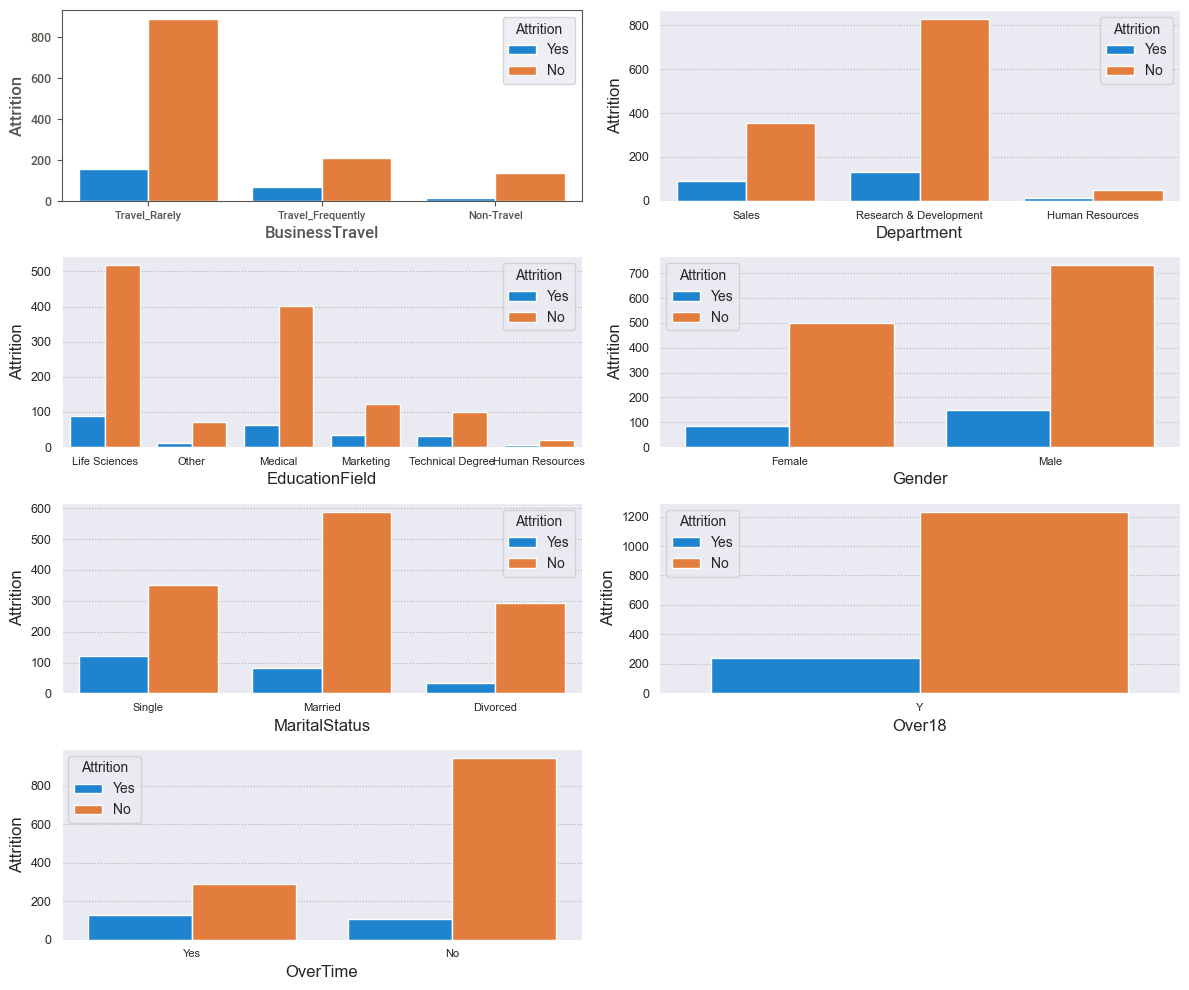

In [16]:
plt.figure(figsize=(12,10),facecolor="white")
plotnumber=1

for column in cat_data.drop(["Attrition","JobRole"],axis=1):
    if plotnumber<=len(cat_data):
        plt.subplot(4,2,plotnumber)
        sns.set_style("darkgrid", {"grid.color": ".7", "grid.linestyle": ":"})
        sns.countplot(x=cat_data[column],hue=data["Attrition"])
        plt.xlabel(column,fontsize=12)
        plt.ylabel('Attrition',fontsize=12)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=9)
    plotnumber+=1
plt.tight_layout()

### RELATIONSHIP BETWEEN JOBROLE  WITH RESPECT TO ATTRITION

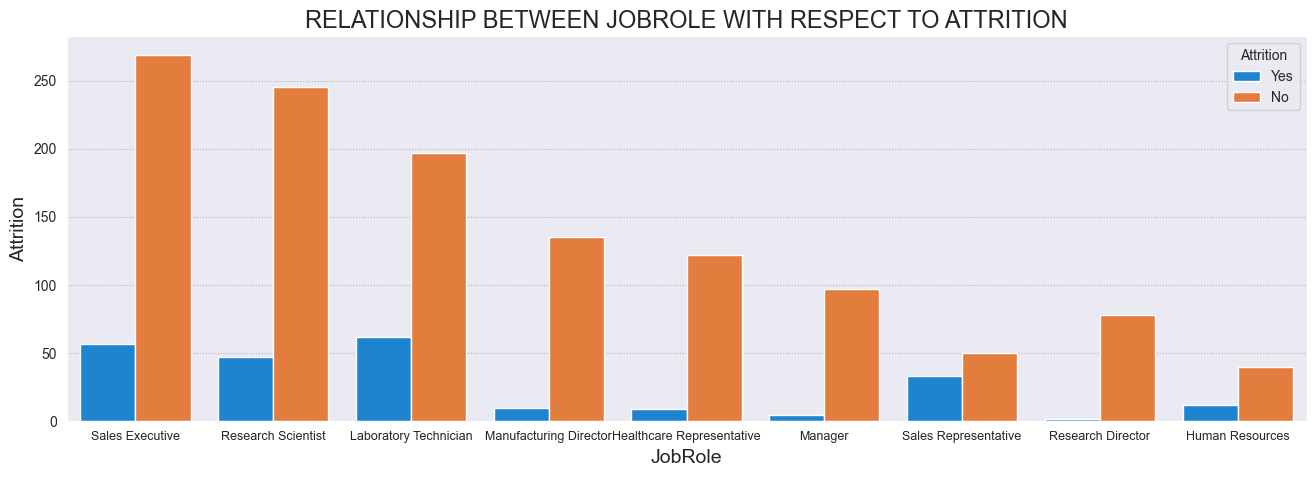

In [17]:
plt.figure(figsize = (16,5),facecolor = "white")
sns.countplot(data=data,x=data["JobRole"],hue=data["Attrition"])
plt.xlabel("JobRole",fontsize=14)
plt.ylabel("Attrition",fontsize=14)
plt.title('RELATIONSHIP BETWEEN JOBROLE WITH RESPECT TO ATTRITION',fontsize = 17)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.show()

### OBSERVATION/INSIGHTS

**1. RELATIONSHIP BETWEEN BUSINESS TRAVEL FIELD AND ATTRITION**

* 1. Employees who travel frequently seem to have a relatively higher Attrition score compared to those who travel rarely or do not travel at all.
* 2. The lowest attrition rate is observed among employees with a Business Travel score of "Non-Travel."
* 3. The attrition rate is comparatively higher among employees who travel frequently ("Travel_Frequently").

**2.RELATIONSHIP BETWEEN DEPARTMENT FIELD AND ATTRITION**
* In Research & Development Department 91.8% employees didn't leave the company that means attrition  is low, and 8.2% employees chance to leave the company that means attrition is high.
* This suggests that attrition is relatively more prevalent in the Research & Development department compared to other departments.

**3. RELATIONSHIP BETWEEN EDUCATION FIELD AND ATTRITION**
* In the observed data, employees with an educational background in life science and medical fields consistently exhibit a higher attrition level (NO) compared to those without attrition (YES). Furthermore, employees with educational backgrounds in life science and medical fields demonstrate a higher attrition level(YES) when compared to employee with education backgrounds in marketing, human resources, other fields, and technical degrees.

**4. RELATIONSHIP BETWEEN GENDER AND ATTRITION**
- In the provided data, we observe a correlation between gender and attrition. Male employees tend to have a higher attrition level (NO) compared to females. Additionally, male employees exhibit a higher attrition level (YES) compared to females.

**5. RELATIONSHIP BETWEEN OVER18 AND ATTRITION**
- In the analysis of the relationship between being over 18 and attrition, it is observed that almost all employees who are over 18, and the majority of employees in general, tend to have a higher attrition level (NO) compared to (YES).

**6. RELATIONSHIP BETWEEN JOB ROLE AND ATTRITION**
- In this data it is observed that employees in the job roles of sales executive, research scientist and laboratory technician tend to have relatively higher attrition level (NO). Furthermore, employees in the job roles of sales executive, research scientist and laboratory technician show significantly higher attrition level (YES).
- Additionally, employees in the job roles of Manufacturing director, Healthcare representative, and manager also exhibit higher occurrences of attrition level (NO).


### CONTINUOUS FEATURE

In [18]:
data1=data[['Age','DailyRate','DistanceFromHome','EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

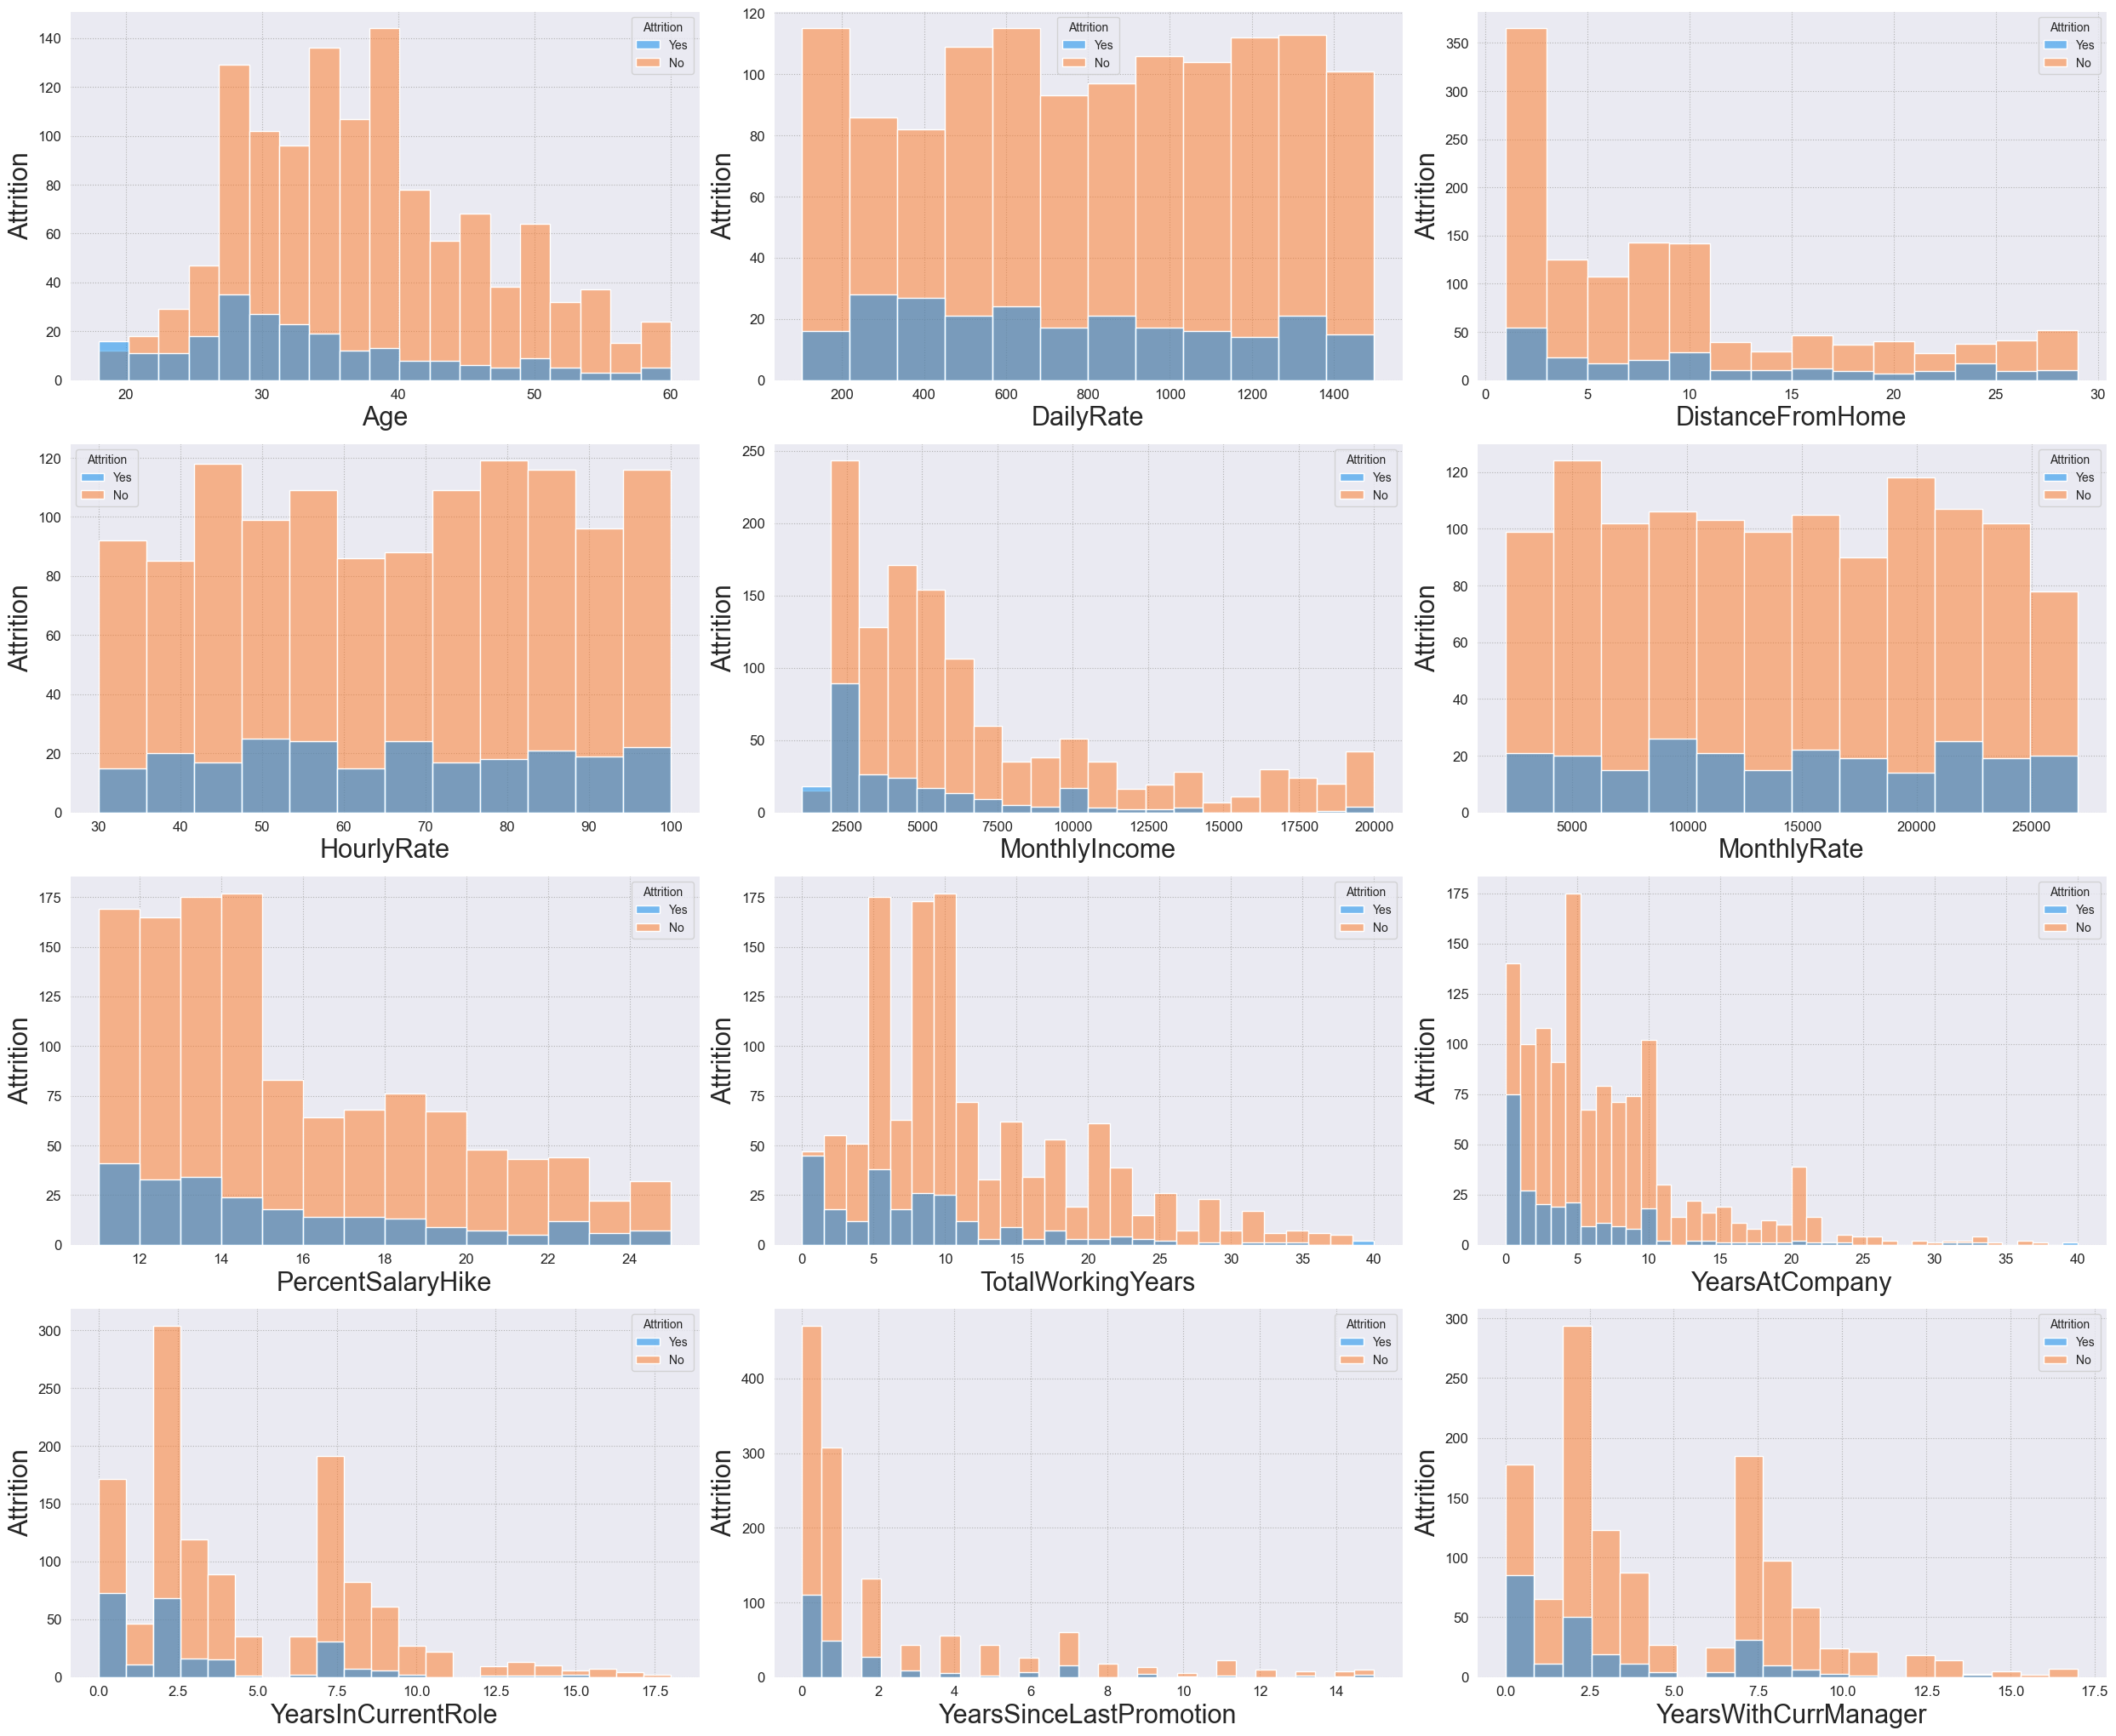

In [19]:
plt.figure(figsize=(25,25), facecolor="white")
plotnumber=1

for column in data1.drop('EmployeeNumber',axis=1):
    if plotnumber<=len(data1):
        plt.subplot(5,3,plotnumber)
        sns.histplot(x=data1[column],hue=data["Attrition"])
        plt.xlabel(column,fontsize=22)
        plt.ylabel("Attrition",fontsize=22)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
    plotnumber+=1
plt.tight_layout()

### OBSERVATION/INSIGHTS
#### 1. RELATIONSHIP BETWEEN AGE AND ATTRITION¶
- In this scenario we can seen that employees aged between 25 and 40 generally receive higher attrition level (NO), while also acknowledging the presence of lower attrition level (YES) within this age group.

#### 2. RELATIONSHIP BETWEEN DAILY RATE AND ATTRITION
- In the provided data, it is evident that employees with a daily rate ranging from 1000 to 1400, specifically with rates of 200, 500, and 600, exhibit a higher attrition level (NO) compared to the attrition level (YES).

#### 3. RELATIONSHIP BETWEEN DISTANCE FROM HOME AND ATTRITION
- It is noted that employees with a distance from home between 0 to 10 units tend to have a higher attrition level (NO). Furthermore, as the distance from home increases, the attrition rate decreases. Additionally, there is a higher attrition level (YES) observed among employees with a distance from home between 0 to 10 units.

#### 4. RELATIONSHIP BETWEEN EMPLOYEE HOURLY RATE AND ATTRITION
- In the provided data, it is evident that employees with an hourly rate ranging from 30 to 100 exhibit a higher attrition level (NO), compared to the attrition level (YES).

#### 5. RELATIONSHIP BETWEEN MONTHLY INCOME AND ATTRITION
- In the dataset, there is a notable trend where employees with a monthly income ranging from 2500 to 7500 tend to have a higher attrition level (NO) compared to the attrition level (YES). Additionally, within this income range, there is also a higher attrition level (YES) when compared to employees with a monthly income above 7500. It can be observed that as the monthly income increases, the attrition level tends to decrease.

#### 6. RELATIONSHIP BETWEEN MONTHLY RATE AND ATTRITION
- In the provided data, it is evident that employees with a monthly rate ranging from 5000 to 25000 exhibit a higher attrition level (NO) compared to the attrition level (YES).

#### 7. RELATIONSHIP BETWEEN PERCENTAGE SALARY HIKE AND ATTRITION
- In the given data, employees with a last salary hike percentage ranging from 10 to 18 demonstrate a higher attrition level (NO) compared to attrition level (YES). Additionally, there is an observed trend suggesting that as the last salary hike percentage increases, the attrition tends to decrease.

#### 8. RELATIONSHIP BETWEEN TOTAL WORKED EXPERIENCE IN YEARS AND ATTRITION
- In the provided data, employees with a total worked experience in years ranging from 0 to 15 tend to show a higher attrition level (NO) compared to attrition level (YES). Moreover, there is a noticeable trend indicating that as the total worked experience in years increases, the attrition tends to decrease.

#### 9. RELATIONSHIP BETWEEN YEARS AT THIS COMPANY AND ATTRITION
- In the provided data, employees with experience years at this company ranging from 0 to 10 tend to show a higher attrition level (YES), while the attrition level (NO) is comparatively lower in these experience ranges. Additionally, there is an observed trend indicating that as the experience years increase, attrition tends to decrease.

#### 10. RELATIONSHIP BETWEEN EXPERIENCE YEARS IN CURRENT ROLE AND ATTRITION
- In the given data, employees with a positive association between the number of years of experience in the current role, ranging from 1 to 2.5, 4, and 7 years, tend to display high attrition levels (YES), while the attrition level (NO) is comparatively lower in these experience ranges.

#### 11. RELATIONSHIP BETWEEN YEARS SINCE LAST PROMOTION AND ATTRITION
- In the provided data, employees with a range of 0 to 2 years since their last promotion tend to show high attrition levels (NO), while the performance ratings at attrition level (YES) are comparatively lower.

#### 12. RELATIONSHIP BETWEEN YEARS WITH CURRENT MANAGER AND ATTRITION
- In the analyzed data, employees who have worked with their current manager for 1, 2.5, and 7.5 years tend to demonstrate high attrition levels (YES) compared to a lower attrition level (NO).

### DESCRETE DATA

In [20]:
data2=data[['Education','EmployeeCount','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance']]

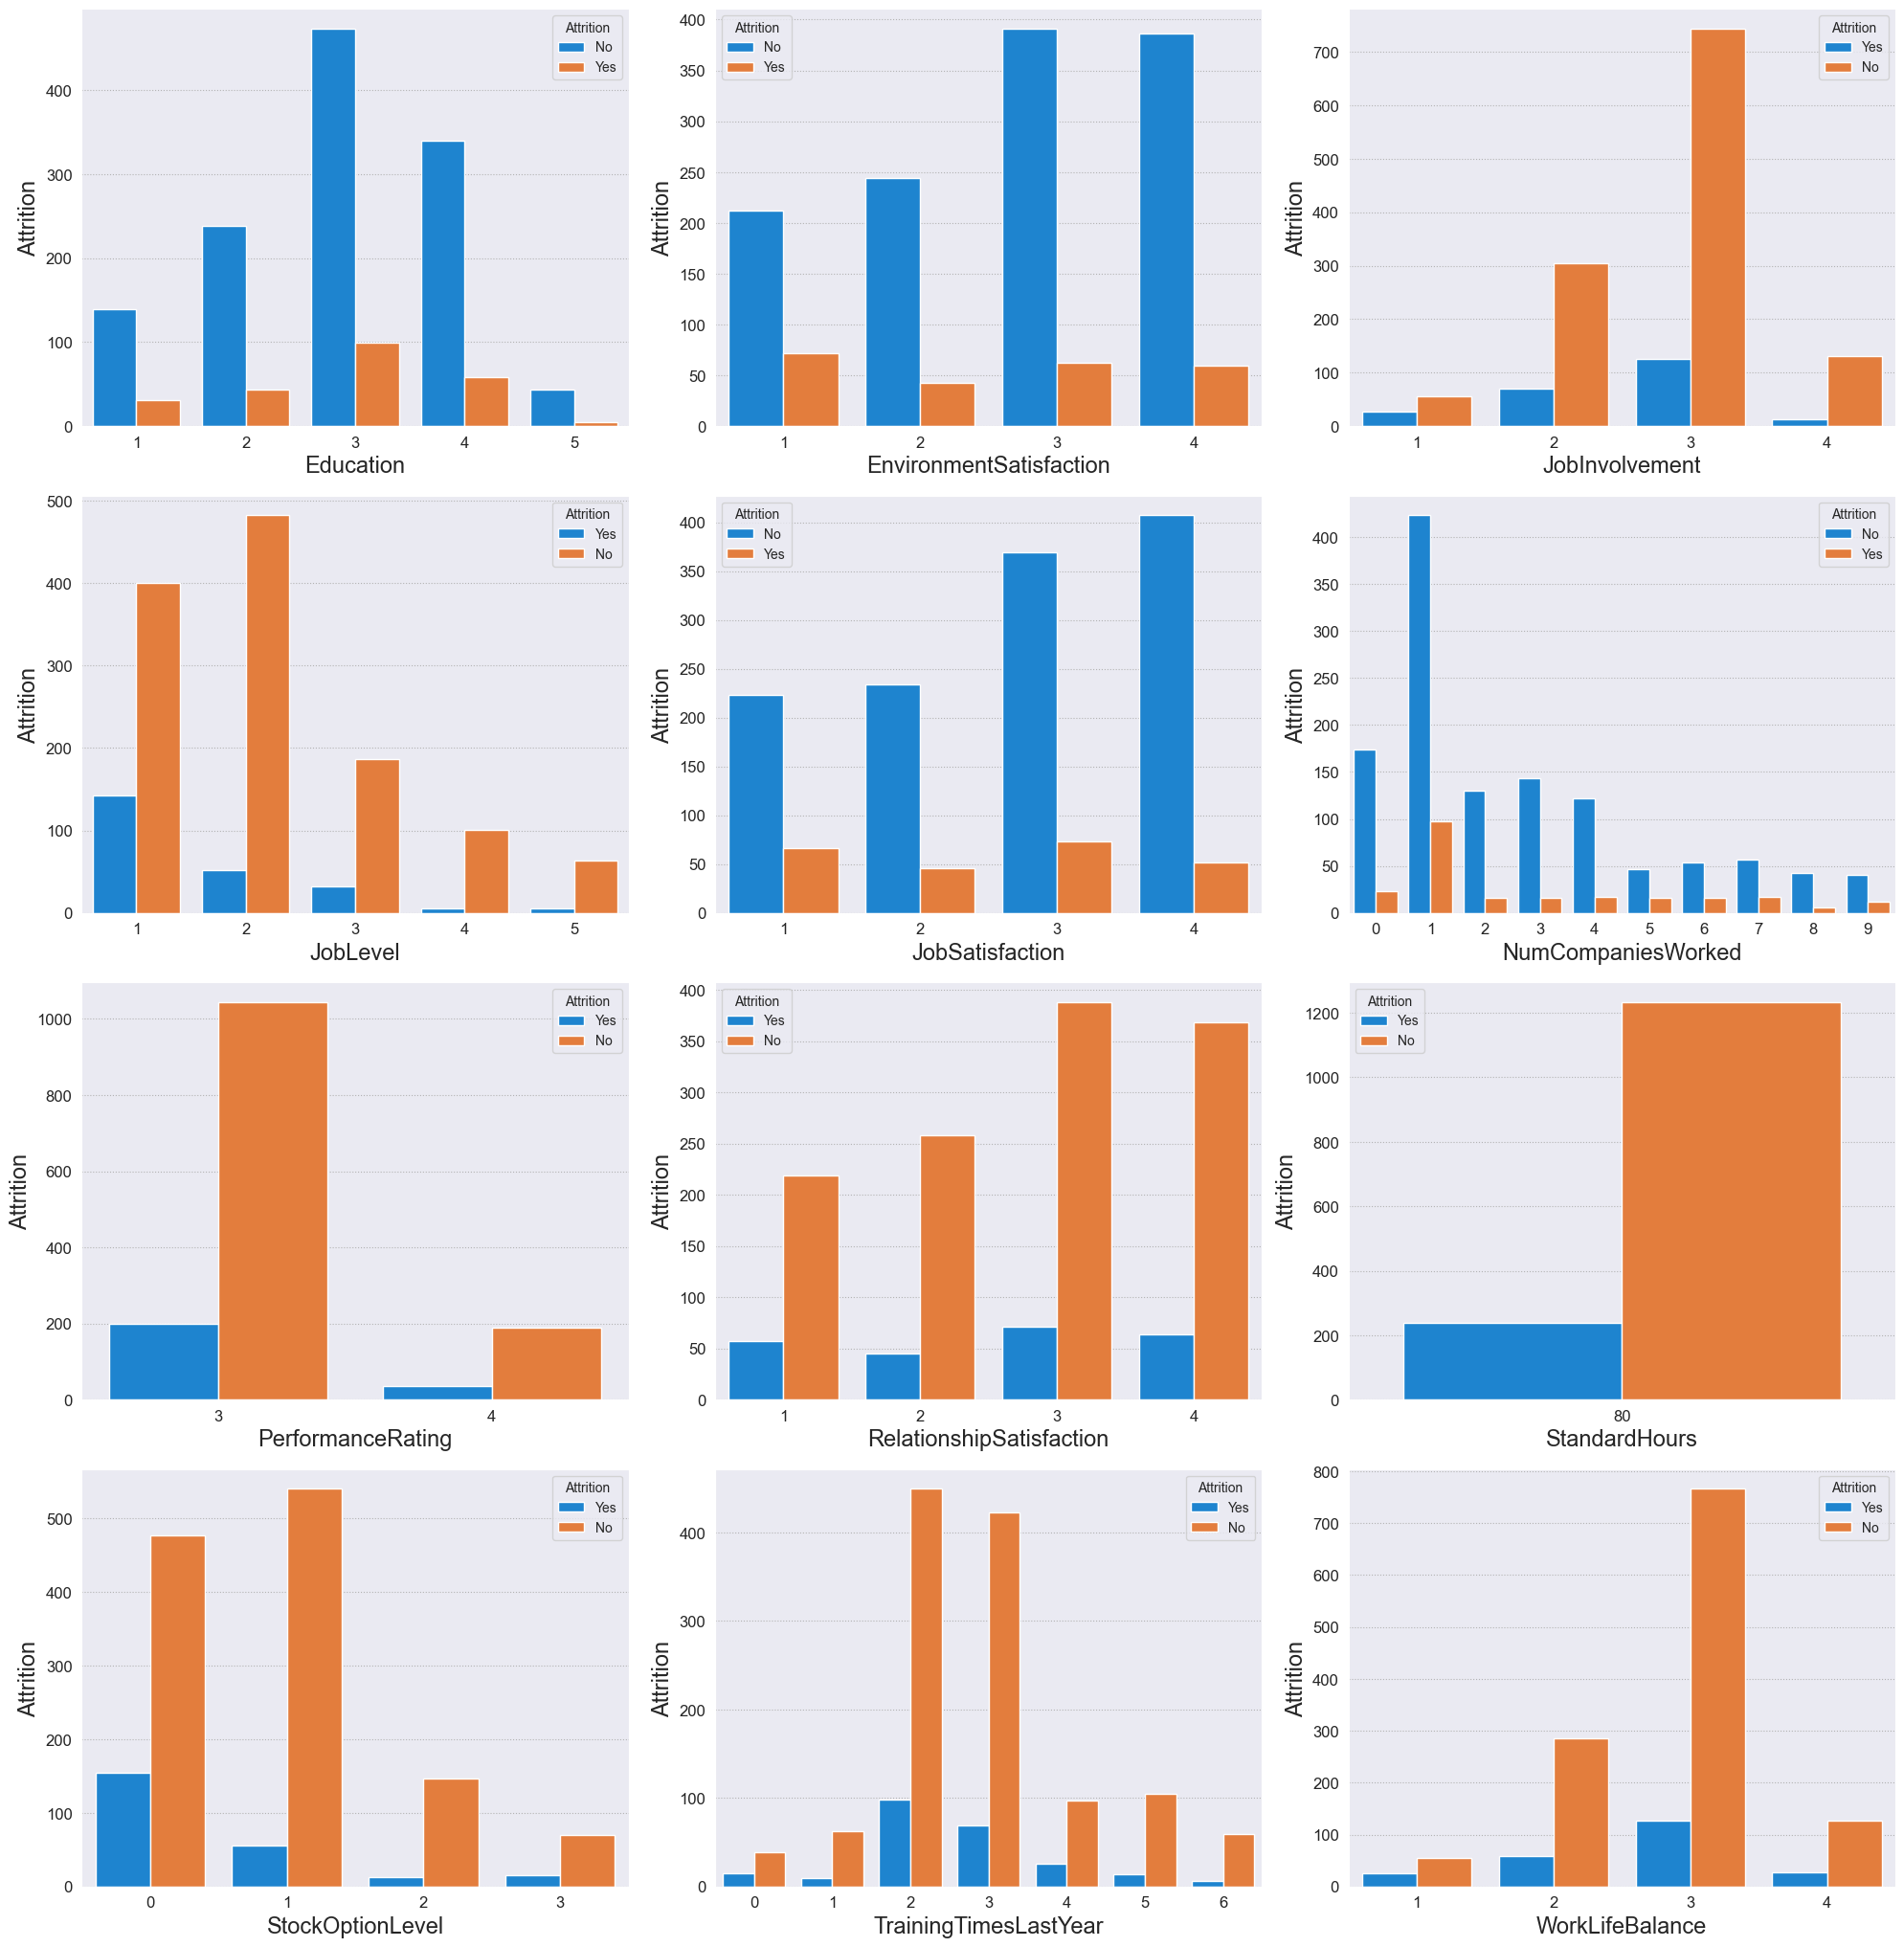

In [21]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber=1

for column in data2.drop("EmployeeCount",axis=1):
    if plotnumber<=len(data2):
        plt.subplot(5,3,plotnumber)
        sns.countplot(x=data2[column],hue=data.Attrition)
        plt.xlabel(column,fontsize=17)
        plt.ylabel("Attrition",fontsize=17)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
    plotnumber+=1
plt.tight_layout()

### OBSERVATION/INSIGHTS
#### 1. RELATIONSHIP BETWEEN EMPLOYEE EDUCATION LEVEL AND ATTRITION
- Employees with education level 3 tend to have higher attrition at performance level No. Education levels 2 and 4 also show elevated attrition at level No. Additionally, education levels 2, 3, and 4 exhibit higher attrition at performance level YES compared to other levels. 

#### 2. RELATIONSHIP BETWEEN EMPLOYEE ENVIRONMENT SATISFACTION AND ATTRITION
- Employees with environment satisfaction levels 3 and 4 have higher attrition at level NO compared to levels 1 and 2, while attrition at level NO is similar for satisfaction levels 1 and 2. 
- Additionally, employees with satisfaction levels 1, 3, and 4 experience higher attrition at level NO compared to satisfaction level 2.


#### 3. RELATIONSHIP BETWEEN EMPLOYEE JOB INVOLVEMENT AND ATTRITION
- Employees with job involvement levels 3 and 2 show higher attrition at level NO compared to levels 1 and 4.
- Furthermore, job involvement levels 3 and 2 also have higher occurrences of attrition at level YES compared to both levels 1 and 4.

#### 4. RELATIONSHIP BETWEEN EMPLOYEE JOB LEVEL AND ATTRITION
- Employees with job levels 1 and 2 exhibit higher attrition at level NO compared to job levels 3, 4, and 5. Specifically, employees with job level 1 have higher attrition at level NO compared to employees with job levels 2, 3, 4, and 5.


#### 5. RELATIONSHIP BETWEEN EMPLOYEE JOB SATISFACTION AND ATTRITION
- Employees with job satisfaction levels 3 and 4 experience higher attrition at level NO compared to levels 1 and 2.
- Additionally, levels 1 and 3 exhibit higher attrition at level YES compared to levels 2 and 4.

#### 6. RELATIONSHIP BETWEEN NUMBER OF COMPANIES WORKED AND ATTRITION
- Employees who have worked at only one company tend to have higher attrition at level NO. Additionally, their attrition at level YES is also high. Moreover, employees who have worked at 0, 2, 3, and 4 companies also exhibit high attrition at level NO.

#### 7. RELATIONSHIP BETWEEN PERFORMANCE RATING AND ATTRITION
- Employees with a performance rating of 3 tend to have higher attrition at level NO. Additionally, their attrition at level YES is also high compared to the other performance rating 4.

#### 8. RELATIONSHIP BETWEEN EMPLOYEE RELATIONSHIP SATISFACTION AND ATTRITION
- Employees with relationship satisfaction levels 3 and 4 have higher attrition at level NO compared to levels 1 and 2. Additionally, levels 1, 3, and 4 exhibit higher attrition at level YES compared to level 2.

#### 9. RELATIONSHIP BETWEEN STANDARD HOURSE AND ATTRITION
- Employees with standard hours set at 80 exhibit higher attrition at level NO compared to level YES.

#### 10. RELATIONSHIP BETWEEN STOCK OPTION LEVEL AND ATTRITION
- Employees with stock option levels 0 and 1 show higher attrition at level NO compared to stock option levels 2 and 3. Additionally, stock option levels 0 and 1 have higher attrition at level YES.

#### 11. RELATIONSHIP BETWEEN TRAINING TIMES LAST YEARS AND ATTRITION
- Employees who attended 2 to 3 training sessions last year have higher attrition at level NO compared to level YES. Additionally, they also exhibit higher attrition at level YES compared to employees with 0, 1, 4, 5, and 6 training sessions.

#### 12. RELATIONSHIP BETWEEN EMPLOYEE WORK LIFE BALANCE AND ATTRITION
- Employees with work-life balance levels 3 and 2 have higher attrition at level NO compared to level YES. Additionally, they also exhibit higher attrition at level YES compared to employees with levels 1 and 4.

## DATA PREPROCESSING

### 1. HANDLE MISSING VALUES

In [22]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- There are no missing values present in data

### 2. HANDLE CATEGORICAL DATA

**1. ATTRITION**

In [23]:
data["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [24]:
data.Attrition=data.Attrition.map({'Yes':0,'No':1})

In [25]:
data.head(2)

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          0      Travel_Rarely       1102                   Sales   
1   49          1  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   

              JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0     Sales Executive                4        Single           5993   
1  Research Scientist                2       Married           5130   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7

**2. BUSINESSTRAVEL**

In [26]:
data.BusinessTravel.value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [27]:
data.BusinessTravel=data.BusinessTravel.map({"Travel_Rarely":2,"Travel_Frequently":1,"Non-Travel":0})

**3. DEPARTMENT**

In [28]:
data.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [29]:
data.Department=data.Department.map({'Research & Development':2,'Sales':1,'Human Resources':0})

**4. EDUCATIONFIELD**

In [30]:
data.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [31]:
data.EducationField=data.EducationField.map({"Life Sciences":5,"Medical":4,"Marketing":3,"Technical Degree":2,"Other":1,"Human Resources":0})

**5. GENDER**

In [32]:
data.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

data.Gender=LE.fit_transform(data.Gender)

**6. JONROLE**

In [34]:
data.JobRole.value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [35]:
data.JobRole=data.JobRole.map({"Human Resources":0,"Research Director":1,"Sales Representative":2,"Manager":3,"Healthcare Representative":4,"Manufacturing Director":5,"Laboratory Technician":6,"Research Scientist":7,"Sales Executive":8})

**7. MARITALSTATUS**

In [36]:
data.MaritalStatus.value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [37]:
data.MaritalStatus=data.MaritalStatus.map({"Divorced":0,"Single":1,"Married":2})

**8. OVERTIME**

In [38]:
data.OverTime.value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [39]:
data.OverTime=data.OverTime.map({"Yes":0,"No":1})

### 3. HANDLE OUTLIER

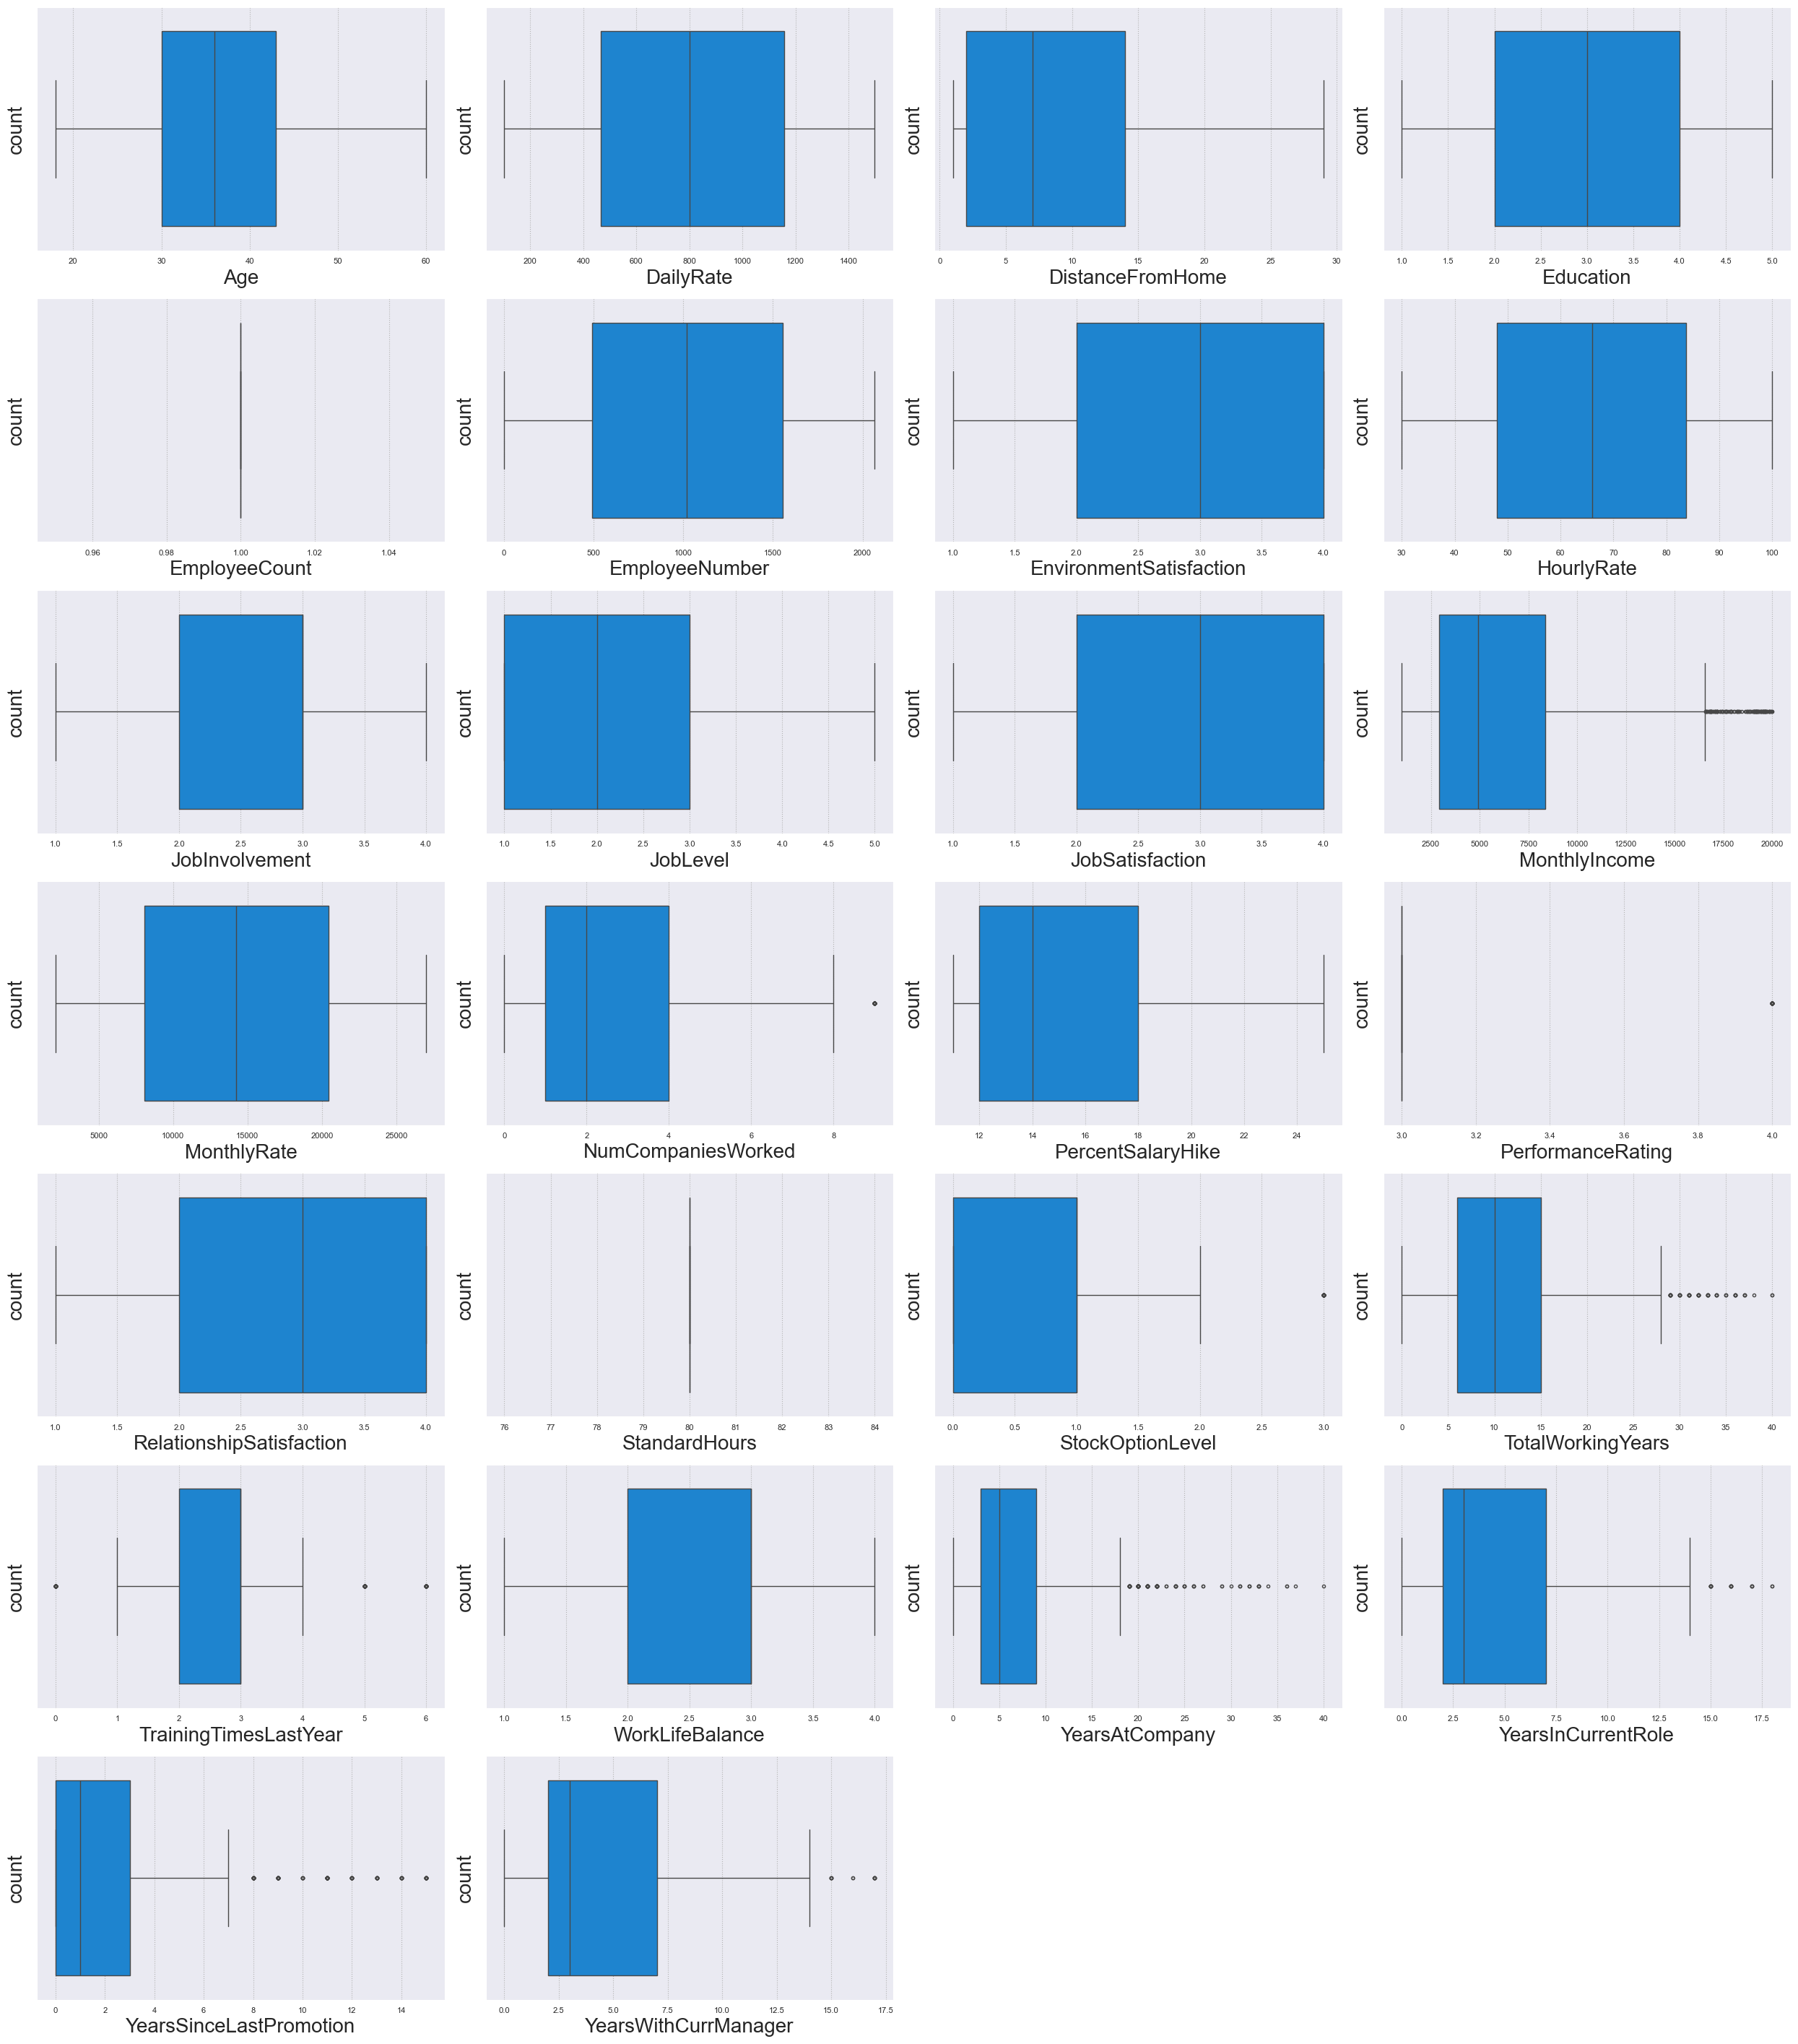

In [40]:
plt.figure(figsize=(25,40),facecolor="white")
plotnumber=1

for column in num_data:
    if plotnumber<=len(num_data):
        plt.subplot(10,4,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
    plotnumber+=1
plt.tight_layout()

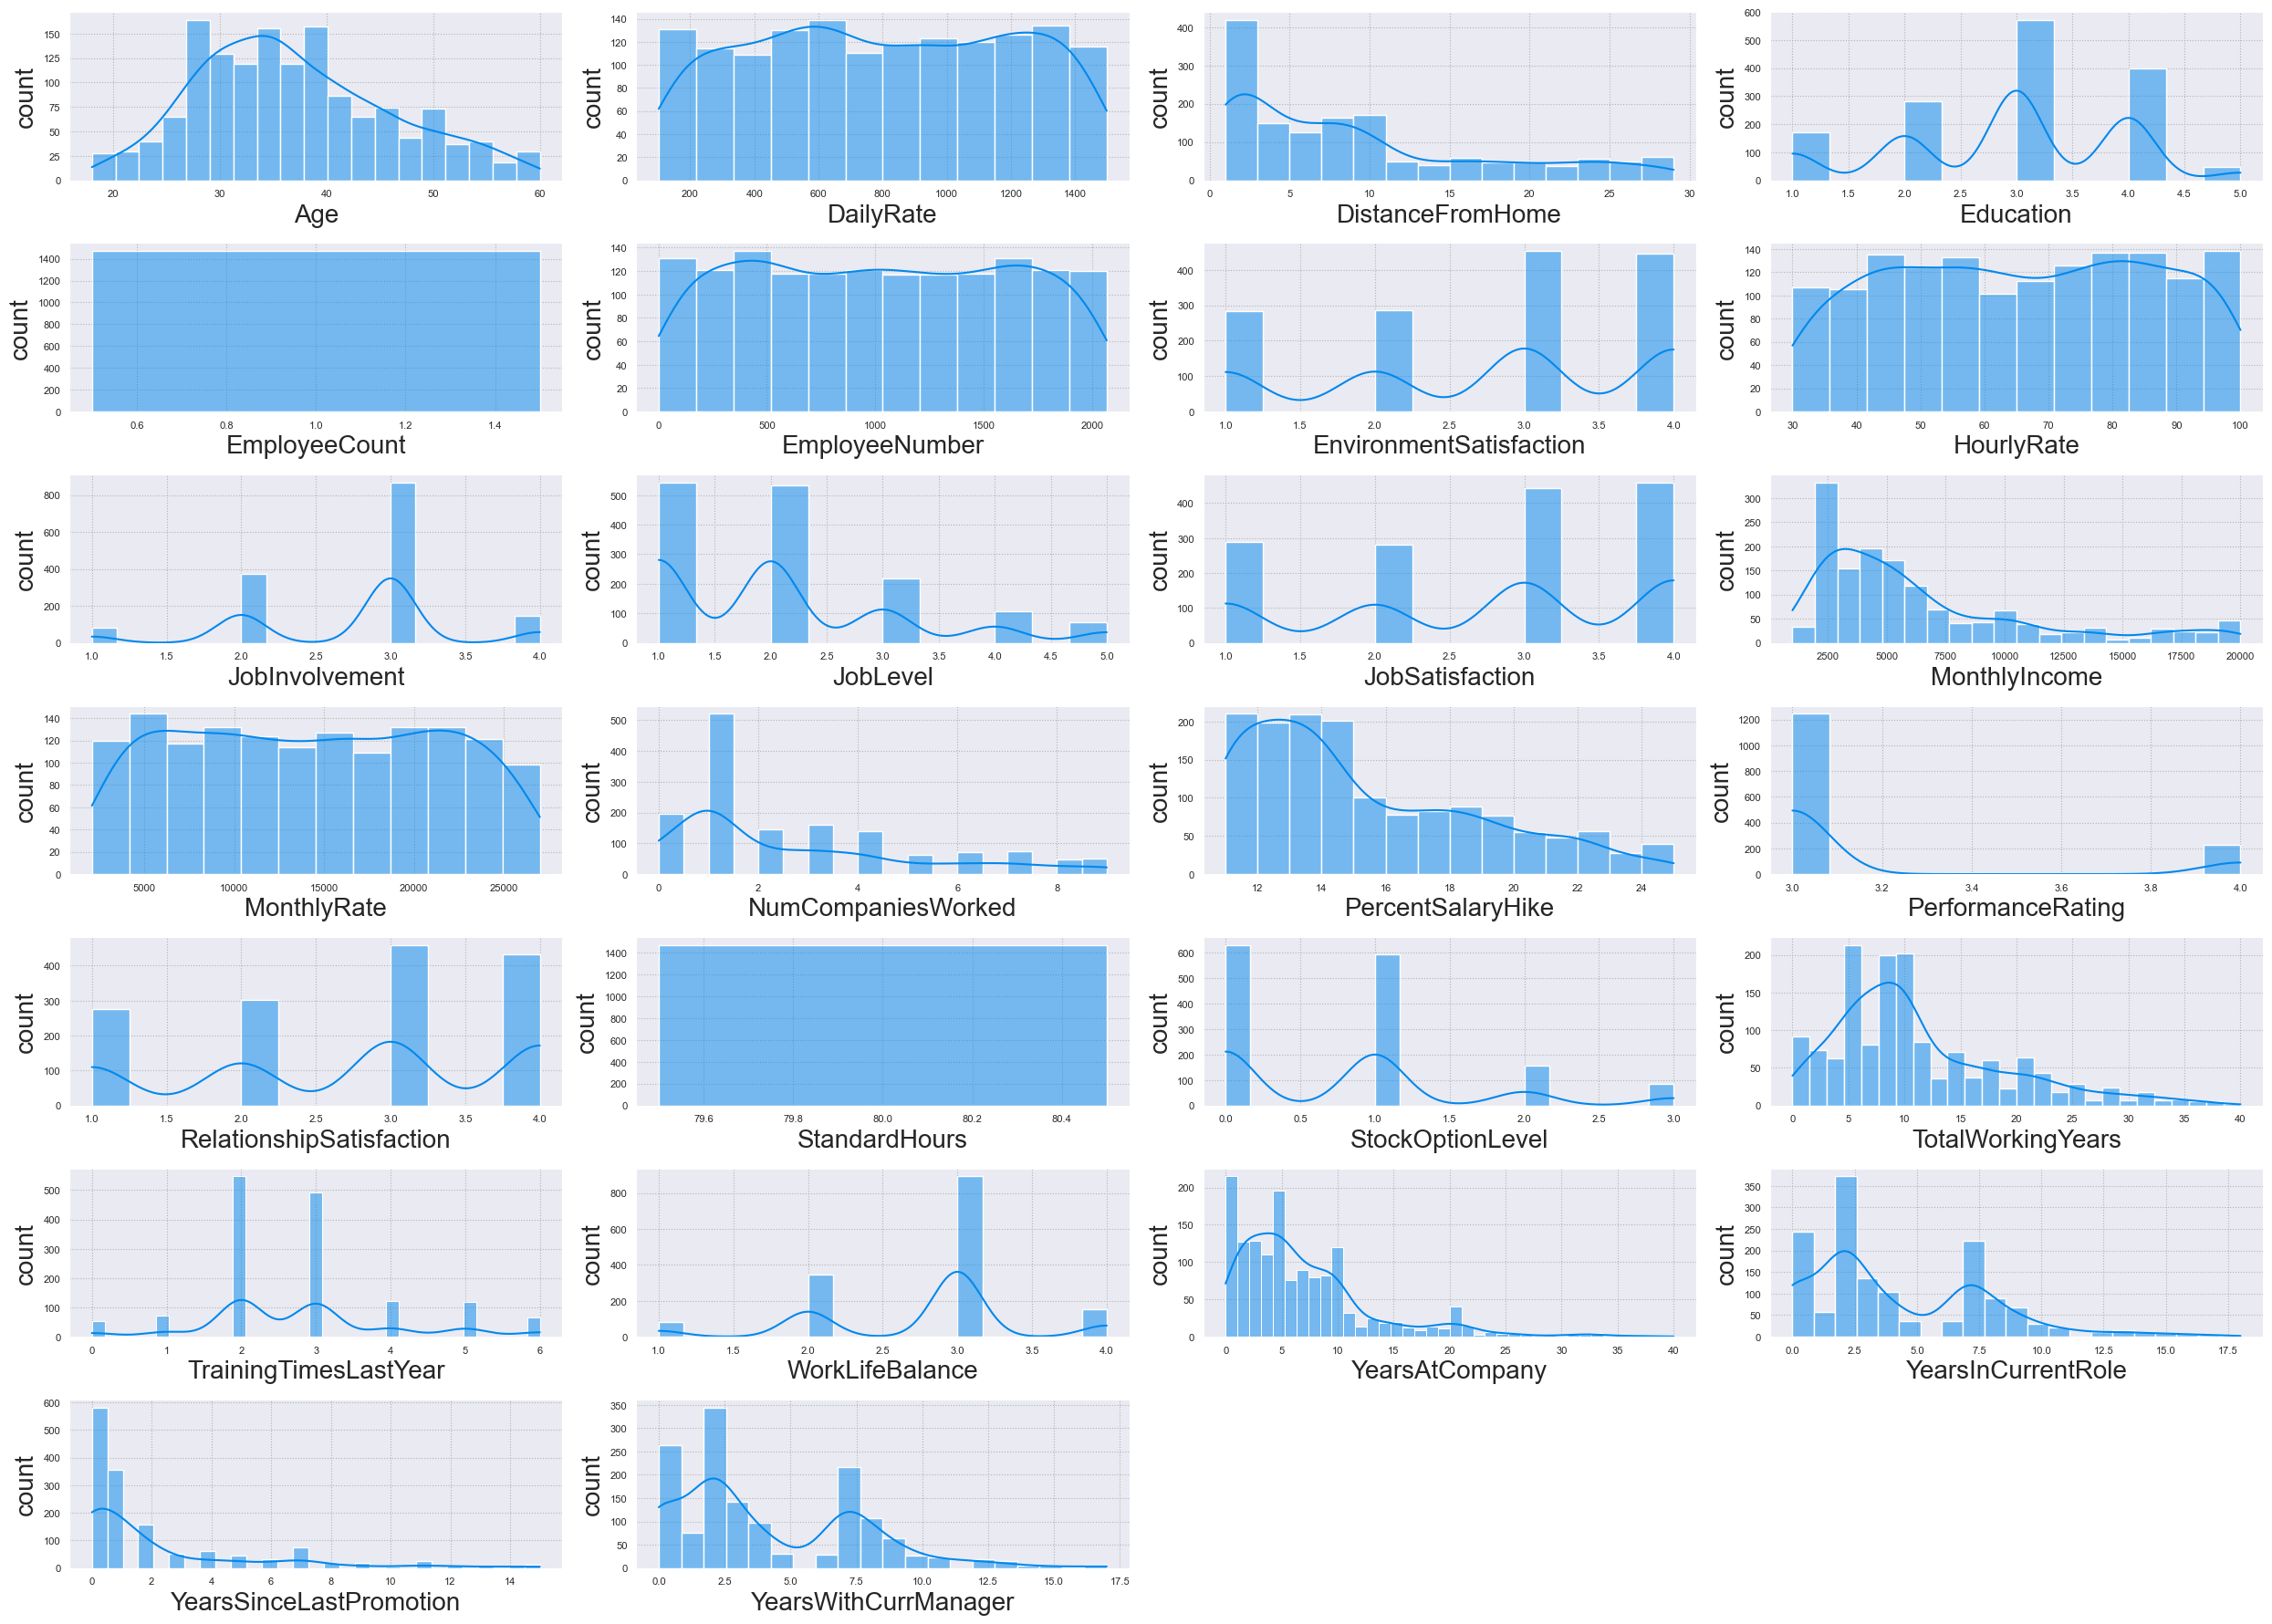

In [41]:
plt.figure(figsize=(25,25),facecolor="white")
plotnumber=1

for column in num_data:
    if plotnumber<=len(num_data):
        plt.subplot(10,4,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
    plotnumber+=1
plt.tight_layout()

**1. MONTHLY INCOME**

In [42]:
# Use iqr range because some skewed in data
iqr = np.percentile(data['MonthlyIncome'], 75) - np.percentile(data['MonthlyIncome'], 25)
print("IQR:", iqr)

# Getting first & third quantile
Q1 = data['MonthlyIncome'].quantile(0.25)
Q3 = data['MonthlyIncome'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5 * iqr
print("Minimum limit:", min_limit)

max_limit = Q3 + 1.5 * iqr
print("Maximum Limit:", max_limit)

IQR: 5468.0
Minimum limit: -5291.0
Maximum Limit: 16581.0


In [43]:
# Impute outlier
data.loc[data['MonthlyIncome'] > max_limit,'MonthlyIncome']=data['MonthlyIncome'].median()

In [44]:
# filtering data after imputation
data.loc[data['MonthlyIncome'] > max_limit]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

**2. NUMCOMPANIEDWORKED**

In [45]:
# Use iqr range because some skewed in data
iqr = np.percentile(data['NumCompaniesWorked'], 75) - np.percentile(data['NumCompaniesWorked'], 25)
print("IQR:", iqr)

# Getting first & third quantile
Q1 = data['NumCompaniesWorked'].quantile(0.25)
Q3 = data['NumCompaniesWorked'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5 * iqr
print("Minimum limit:", min_limit)

max_limit = Q3 + 1.5 * iqr
print("Maximum Limit:", max_limit)

IQR: 3.0
Minimum limit: -3.5
Maximum Limit: 8.5


In [46]:
# Impute outlier
data.loc[data['NumCompaniesWorked'] > max_limit,'NumCompaniesWorked']=data['NumCompaniesWorked'].median()

In [47]:
# filtering data after imputation
data.loc[data['NumCompaniesWorked'] > max_limit]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

#### 3. TOTAL WORKING YEARS

In [48]:
# Use iqr range because some skewed in data
iqr = np.percentile(data['TotalWorkingYears'], 75) - np.percentile(data['TotalWorkingYears'], 25)
print("IQR:", iqr)

# Getting first & third quantile
Q1 = data['TotalWorkingYears'].quantile(0.25)
Q3 = data['TotalWorkingYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5 * iqr
print("Minimum limit:", min_limit)

max_limit = Q3 + 1.5 * iqr
print("Maximum Limit:", max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [49]:
# Impute outlier
data.loc[data['TotalWorkingYears'] > max_limit,'TotalWorkingYears']=data['TotalWorkingYears'].median()

In [50]:
# filtering data after imputation
data.loc[data['TotalWorkingYears'] > max_limit]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

#### 4. TRAINING TIME LAST YEARS

In [51]:
# Use iqr range because some skewed in data
iqr = np.percentile(data['TrainingTimesLastYear'], 75) - np.percentile(data['TrainingTimesLastYear'], 25)
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TrainingTimesLastYear'].quantile(0.25)
Q3 = data['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [52]:
# Impute outlier in max & minmum limit
data.loc[data['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()

In [53]:
# Filtering the min limit
data.loc[data['TrainingTimesLastYear'] < min_limit]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

#### 5. YEARS AT COMPANY

In [54]:
# Use iqr range because some skewed in data
iqr = np.percentile(data['YearsAtCompany'], 75) - np.percentile(data['YearsAtCompany'], 25)
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['YearsAtCompany'].quantile(0.25)
Q3 = data['YearsAtCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 6.0
Minimum limit: -6.0
Maximum Limit: 18.0


In [55]:
# Impute outlier
data.loc[data['YearsAtCompany'] > max_limit,'YearsAtCompany']=data['YearsAtCompany'].median()

In [56]:
# Filtering the data
data.loc[data['YearsAtCompany'] > max_limit]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

#### 6. YEARS IN CURRENT ROLE

In [57]:
# Use iqr range because some skewed in data
iqr = np.percentile(data['YearsInCurrentRole'], 75) - np.percentile(data['YearsInCurrentRole'], 25)
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['YearsInCurrentRole'].quantile(0.25)
Q3 = data['YearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [58]:
# Impute the outlier
data.loc[data['YearsInCurrentRole'] > max_limit,'YearsInCurrentRole'] = data['YearsInCurrentRole'].median()

In [59]:
# Filtering the data
data.loc[data['YearsInCurrentRole'] > max_limit]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

#### 7. YEARS SINCE LAST PROMOTION

In [60]:
# use iqr because some skewed in data
iqr = np.percentile(data['YearsSinceLastPromotion'], 75) - np.percentile(data['YearsSinceLastPromotion'], 25)
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [61]:
# impute outlier
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()

In [62]:
# Filtering data
data.loc[data['YearsSinceLastPromotion'] > max_limit]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

#### 8. YEARS WITH CURRENT MANAGER

In [63]:
# use iqr because some skewed in data
iqr = np.percentile(data['YearsWithCurrManager'], 75) - np.percentile(data['YearsWithCurrManager'], 25)
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsWithCurrManager'].quantile(0.25)
Q3 = data['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [64]:
# impute outlier
data.loc[data['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()

In [65]:
# Filtering the data
data.loc[data['YearsWithCurrManager'] >max_limit]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

### CHECKING OUTLIER AFTER IMPUTATION

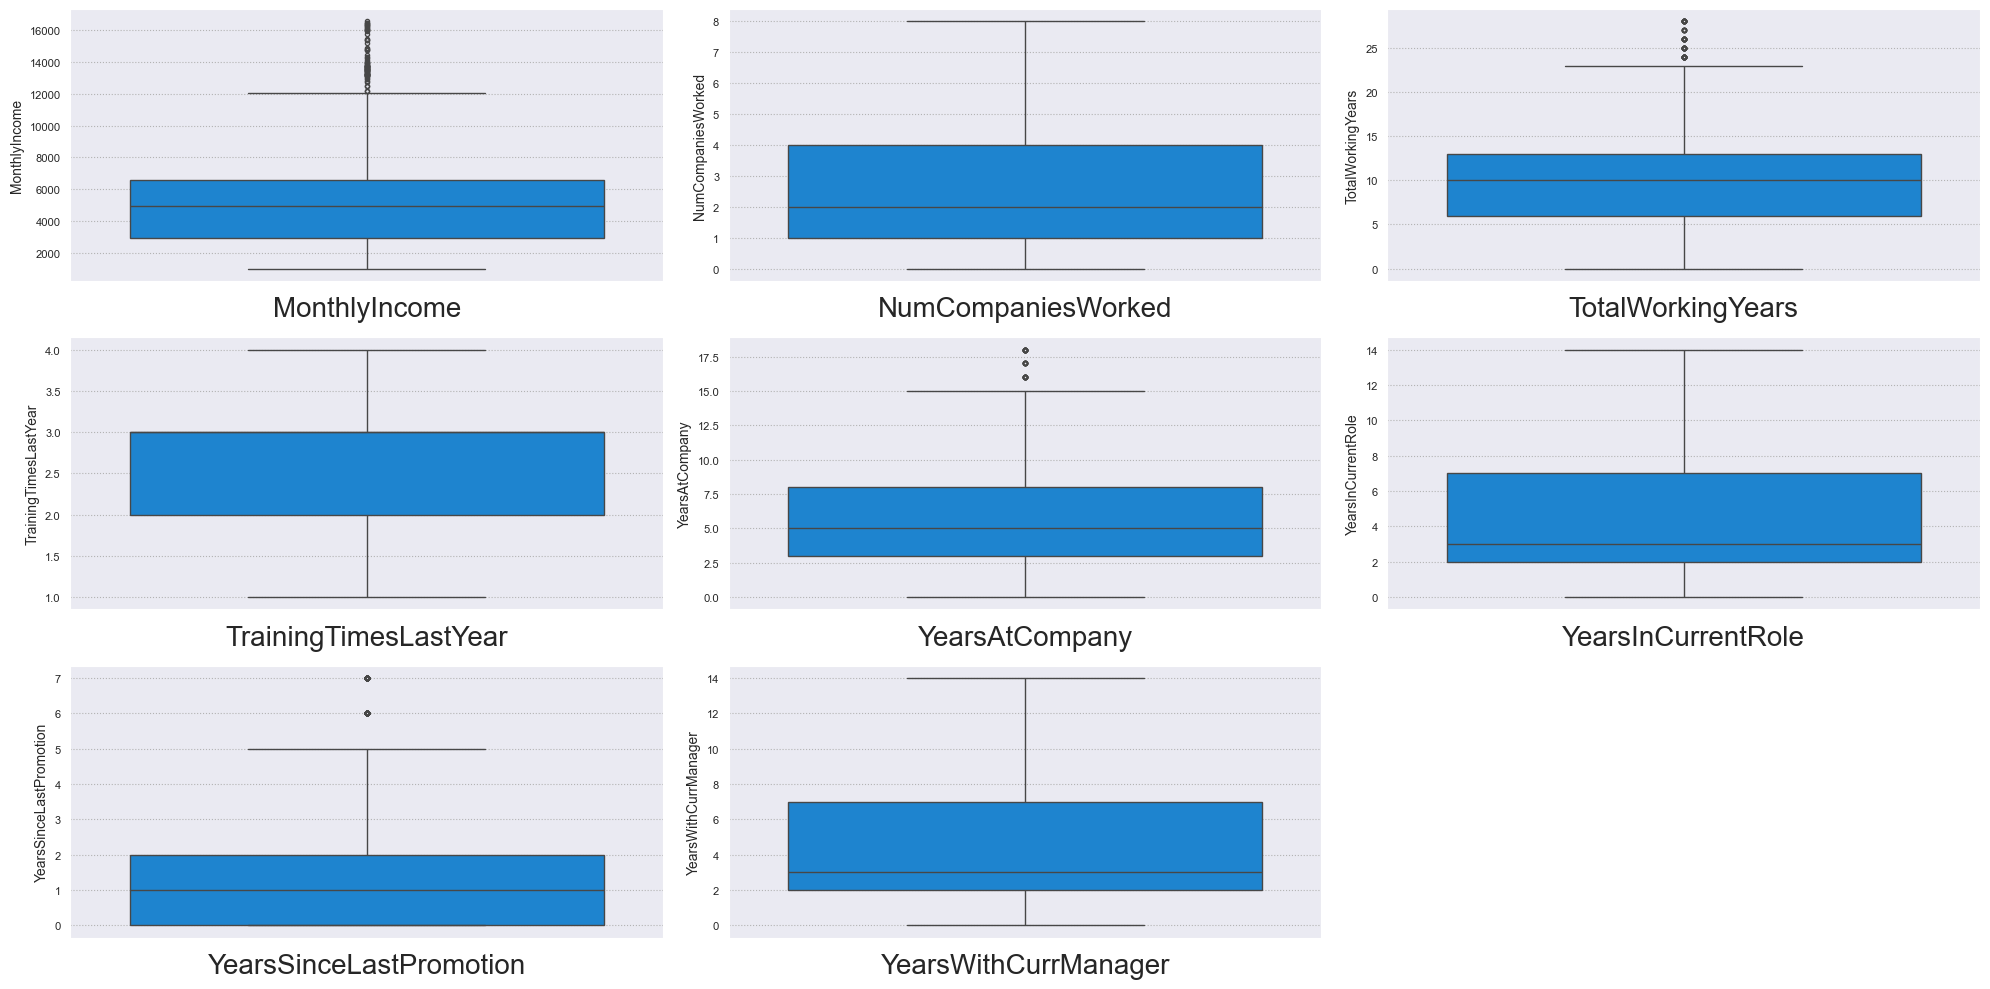

In [66]:
out = data[['MonthlyIncome','NumCompaniesWorked','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
            'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / accessing the columns from count 
    if plotno<=8:    # set the limit to 8 instead of 7
        plt.subplot(3,3,plotno) # plotting 8 graphs (3-rows,3-columns), plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plotno+=1 # counter increment

plt.tight_layout()
plt.show() # used to hide the storage location

### FEATURE TRANSFORMATION

In [67]:
import scipy.stats as stats
import pylab
# define a function to plot a Q-Q plot
def plot_data(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

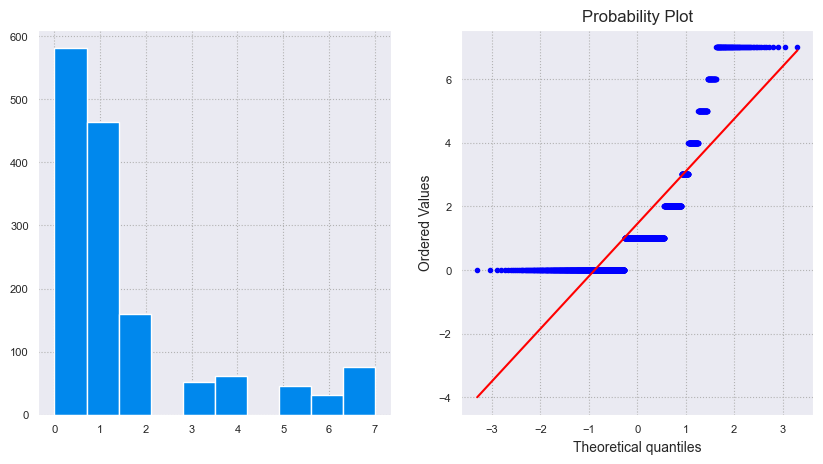

In [68]:
plot_data(data,'YearsSinceLastPromotion')

### SQUARE ROOT TRANSFORMATION

In [69]:
data['square_YearsSinceLastPromotion'] = data.YearsSinceLastPromotion**(1/2)

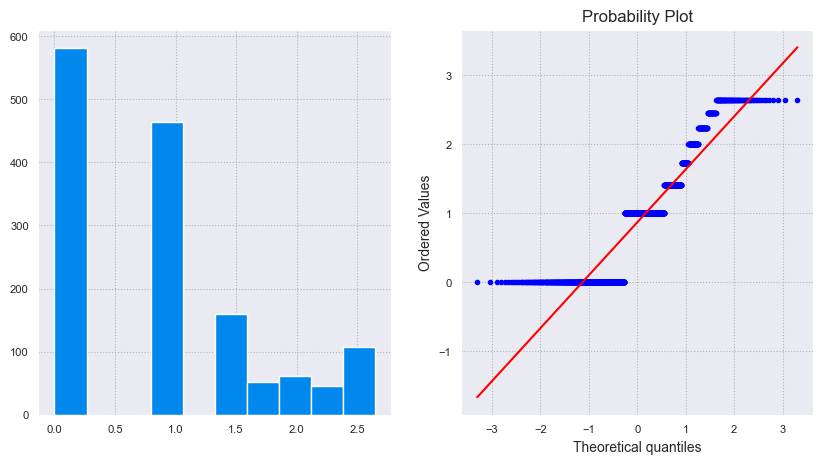

In [70]:
plot_data(data,'square_YearsSinceLastPromotion')

### 4. SCALING

In [71]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

data[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
      'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager',
      'square_YearsSinceLastPromotion']]=scalar.fit_transform(data[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
      'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager',
      'square_YearsSinceLastPromotion']])

In [72]:
data.head()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0  0.446350          0               2   0.742527           1   
1  1.322365          1               1  -1.297775           2   
2  0.008343          0               2   1.414363           2   
3 -0.429664          1               1   1.461466           2   
4 -1.086676          1               2  -0.524295           2   

   DistanceFromHome  Education  EducationField  EmployeeCount  EmployeeNumber  \
0         -1.010909          2               5              1               1   
1         -0.147150          1               5              1               2   
2         -0.887515          2               1              1               4   
3         -0.764121          4               5              1               5   
4         -0.887515          1               4              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2       0    1.383138               3         2   
1                        3       1   -0.240677               2         2   
2                        4       1    1.284725               2         1   
3                        4       0   -0.486709               3         1   
4                        1       1   -1.274014               3         1   

   JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  \
0        8                4              1       0.167809     0.726020   
1        7                2              2      -0.102624     1.488876   
2        6                3              1      -1.055253    -1.674841   
3        7                3              2      -0.798607     1.243211   
4        6                2              2      -0.623436     0.325900   

   NumCompaniesWorked Over18  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Y         0          -1.150554                  3   
1                   1      Y         1           2.129306                  4   
2                   6      Y         0          -0.057267                  3   
3                   1      Y         0          -1.150554                  3   
4                   2      Y         1          -0.877232                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.366366               0.544124                1        0.077846   
1          -0.049194               0.544124                3        1.108775   
2          -0.524951               0.544124                3       -1.468549   
3          -0.366366               0.544124                3        0.593310   
4          -0.683537               0.544124                3       -0.953084   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0           -0.013060                        0              0.297624   
1            0.886888                        1              0.891659   
2           -1.212991                        0             -1.187464   
3            0.886888                        3             -1.187464   
4           -0.613026                        2             -0.593429   

   square_YearsSinceLastPromotion  
0                       -1.048888  
1                        0.154744  
2                       -1.048888  
3                        1.035864  
4                        0.653305

### FEATURE SELECTION

#### 1. DROP UNIQUE AND CONSTANT COLUMN

In [73]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','YearsSinceLastPromotion'],axis=1,inplace=True)

#### 2. CHECK CORRELATION

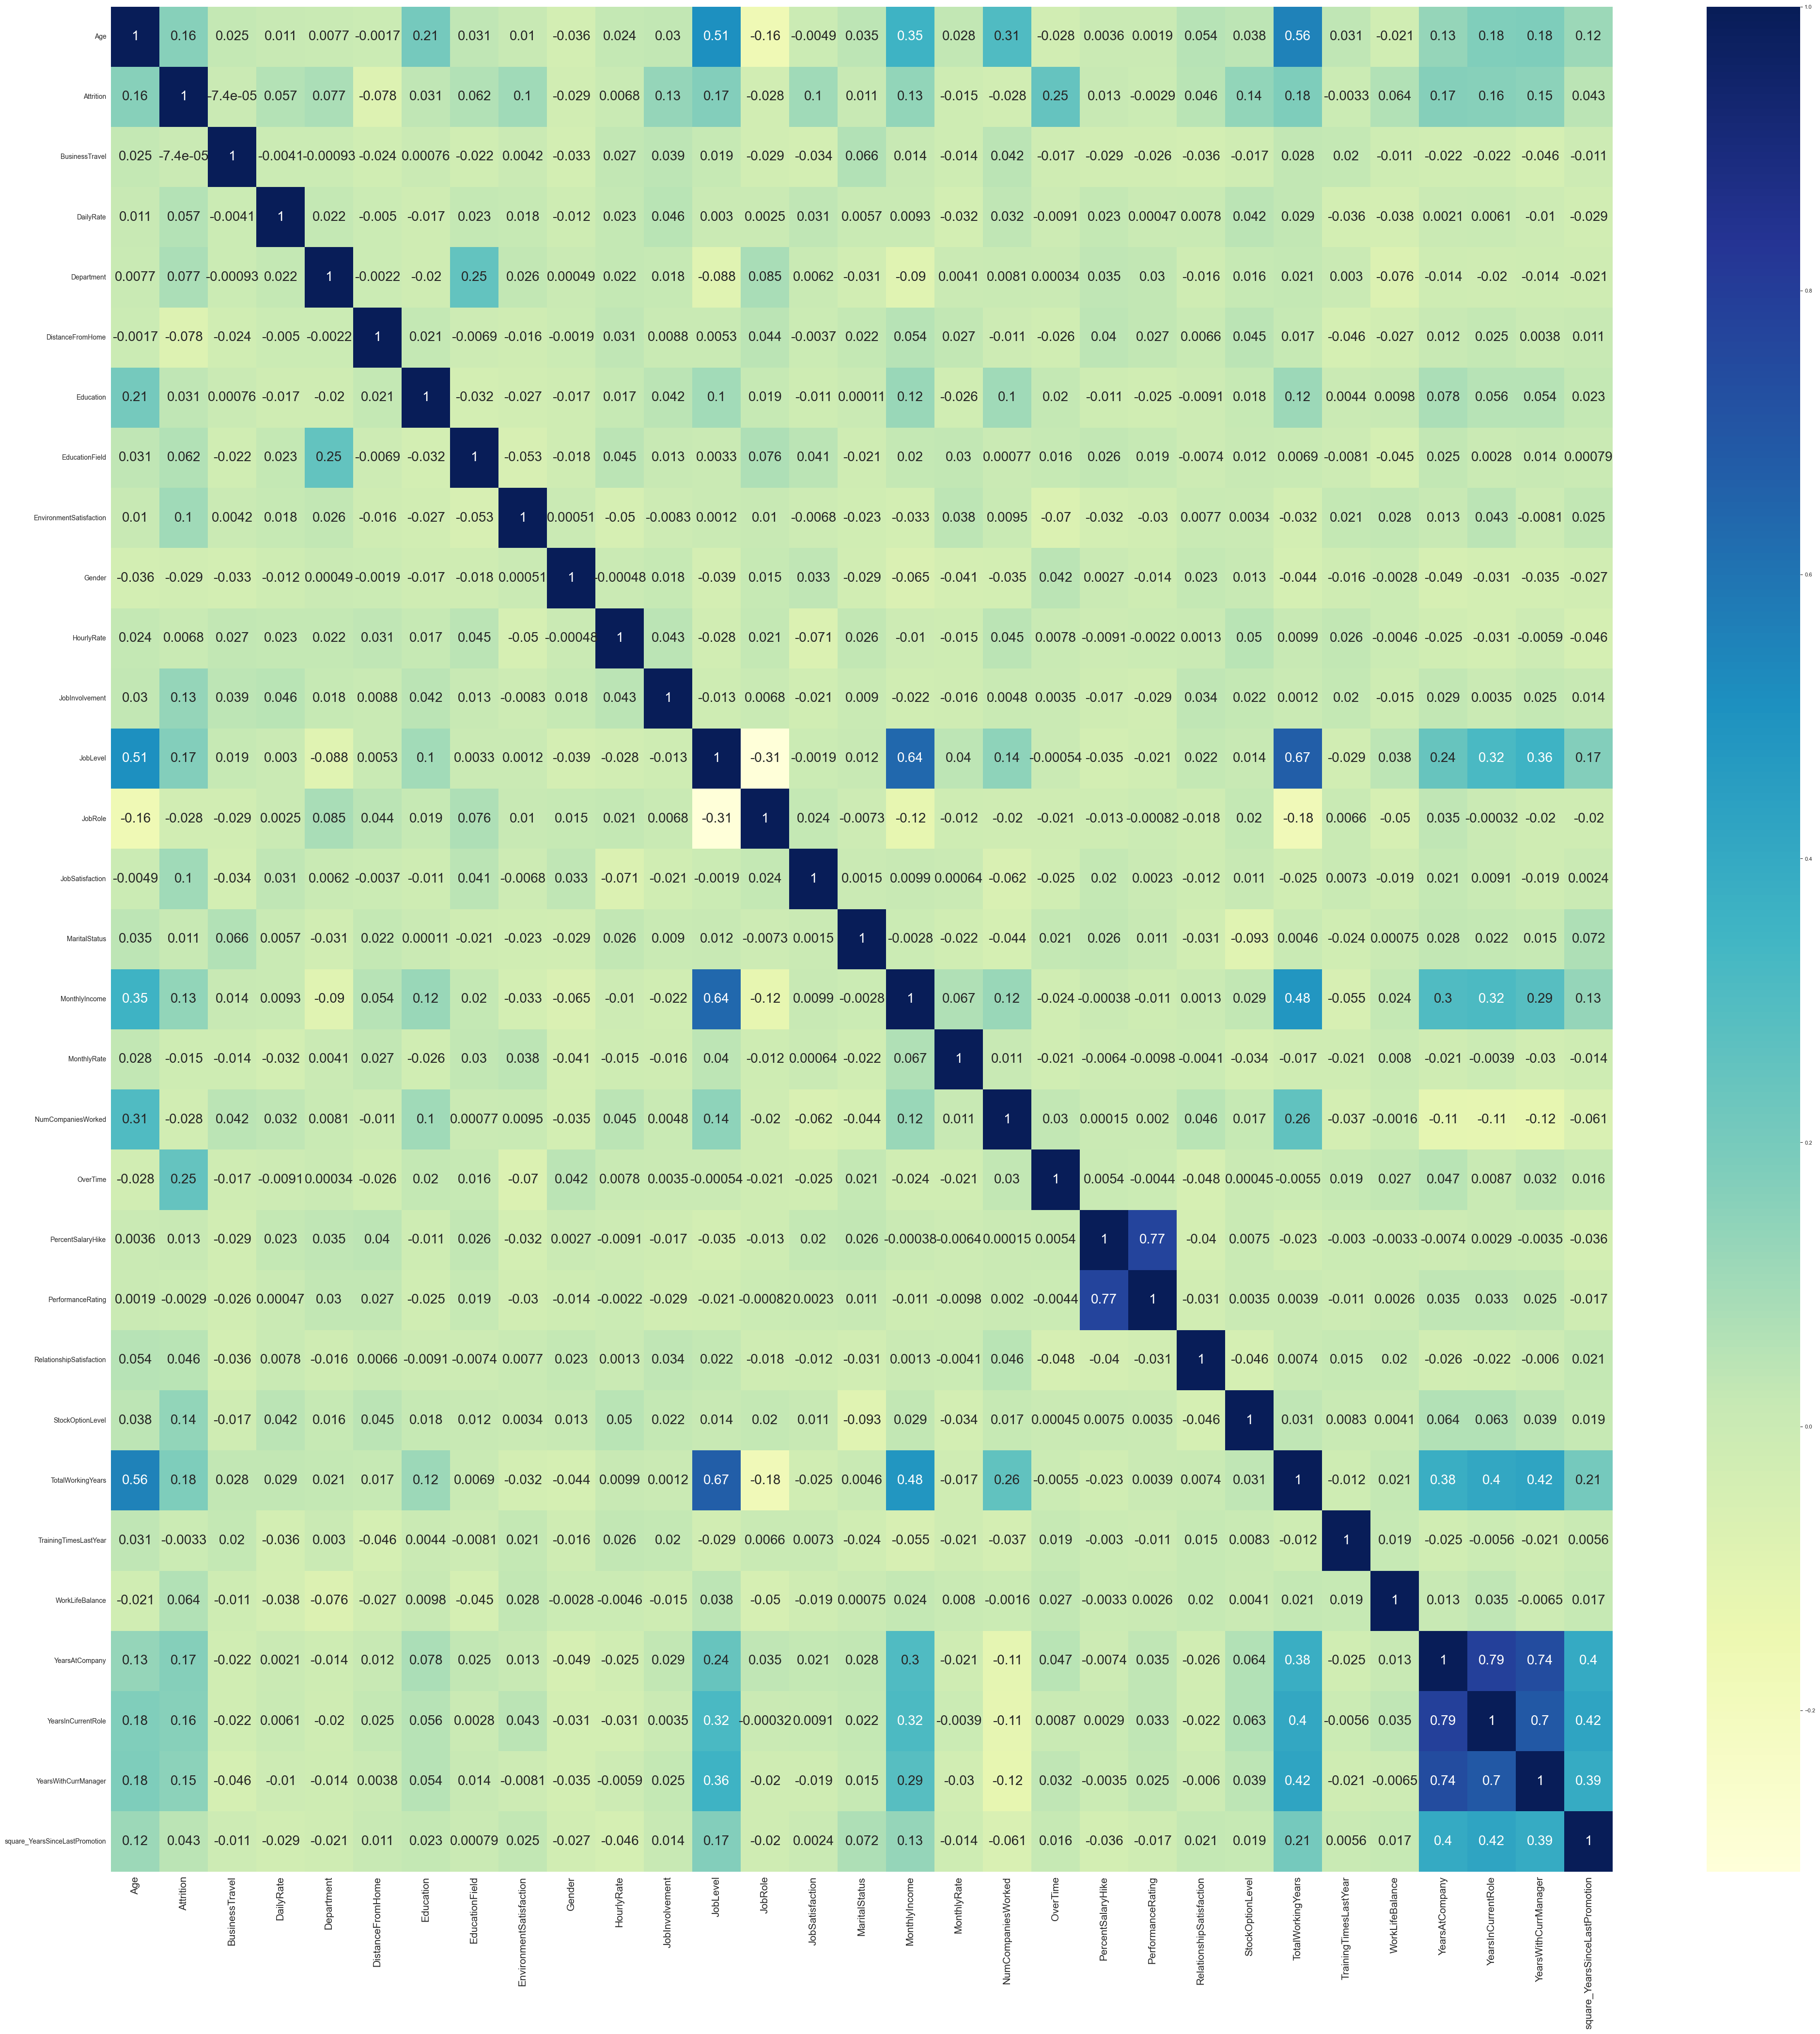

In [74]:
plt.figure(figsize=(50,50))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu",annot_kws={"size":20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.show()

In [75]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

Empty DataFrame
Columns: [feature1, feature2, corr]
Index: []

- Now we confirm their is no highly correlated feature is present.

### PCA

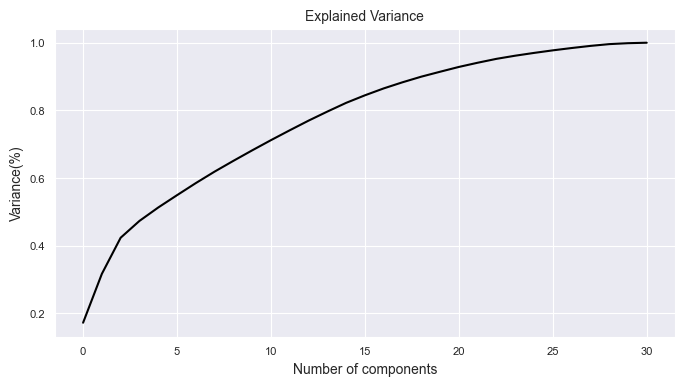

In [76]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(data)
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=10)
plt.ylabel('Variance(%)',fontsize=10) # for each componant
plt.title('Explained Variance',fontsize=10)
plt.show()

In [77]:
# Selecting the components
pca = PCA(n_components=30)
new_data = pca.fit_transform(data)
new_data

array([[-0.23763397,  5.97795127, -0.11016631, ...,  0.72927086,
         0.18665446,  0.3493329 ],
       [-1.56784114, -0.74096345,  1.89795828, ..., -0.25951204,
         0.23277807,  0.05483548],
       [ 0.14750368,  3.43827659, -3.23433541, ...,  0.97481713,
         0.24443787,  0.35916557],
       ...,
       [-0.61773053, -1.51675954, -0.93419635, ...,  0.66499333,
         0.67119964, -0.39388766],
       [-1.73505507,  0.84760703,  2.1249561 , ..., -0.20749638,
        -0.22043079,  0.01005997],
       [-0.97899601, -0.23262471, -0.67740183, ..., -0.05708321,
         0.08340055, -0.06304657]])

In [78]:
principle_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25','pca26','pca27','pca28','pca29','pca30'])

# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['Attrition']=data.Attrition

principle_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -0.237634  5.977951 -0.110166 -1.227400 -0.662737 -0.409327  1.264632   
1 -1.567841 -0.740963  1.897958 -1.082536 -0.638249 -0.065866 -0.933355   
2  0.147504  3.438277 -3.234335  2.759515 -0.466449 -0.612755  0.515594   
3 -2.329384 -0.684265  0.416249 -0.632651 -0.832499 -1.474442 -1.299743   
4 -1.400207 -0.402776 -1.611495 -0.124432 -0.775127  0.575406 -0.866457   

       pca8      pca9     pca10     pca11     pca12     pca13     pca14  \
0  0.383219 -1.443683 -0.980601 -1.292113 -0.463358  2.059603 -0.893436   
1  0.131780  1.947126  0.039435  2.577443 -1.542515  1.007104 -0.188199   
2  0.343421 -0.973377  1.712119 -1.443995 -1.056173  0.975216  0.505717   
3  0.208484 -0.780191  0.198505 -0.431485  0.709639 -0.636841 -1.943904   
4 -1.668514 -0.014661 -1.919677  0.264011 -1.668899  0.398177  0.284706   

      pca15     pca16     pca17     pca18     pca19     pca20     pca21  \
0 -0.176151 -0.223362 -1.366340 -0.405895 -0.355502 -0.953018  1.386116   
1 -0.596784 -0.043817  0.546425 -1.261108  0.636081  0.934692  0.108442   
2 -0.693610 -0.682103 -0.688785 -0.078654 -0.803581  0.684024  0.112897   
3  1.135653 -1.297451 -0.154135  0.218413  0.282604  0.310562 -0.309055   
4  0.951039 -0.375365  0.920735  0.109349  0.986775 -0.273553 -0.222704   

      pca22     pca23     pca24     pca25     pca26     pca27     pca28  \
0  0.050672 -0.525690  1.080709  0.418553  0.314025  0.753362  0.729271   
1  0.424054 -0.771519  0.134350 -0.180014 -0.312001 -0.490834 -0.259512   
2 -0.441044 -0.264140 -0.134765 -0.385253 -0.397016 -0.067922  0.974817   
3  0.351851 -0.240007 -1.241872  0.873732 -0.080046  0.805811  0.266790   
4 -0.174758  0.219054 -0.400106 -0.307201 -0.253652 -0.459571 -0.020079   

      pca29     pca30  Attrition  
0  0.186654  0.349333          0  
1  0.232778  0.054835          1  
2  0.244438  0.359166          0  
3  0.326739 -0.291368          1  
4 -0.376093 -0.151540          1

#### 3. CHECK DUPLICATE VALUES 

In [79]:
data.duplicated().sum()

0

Their is no duplicate value are present in data

In [80]:
principle_df.to_csv('HR_employee_Attrition_preprocessed_data.csv')

# Reading new preprocess csv file
df = pd.read_csv('HR_employee_Attrition_preprocessed_data.csv')

# Get first five rows 
df.head()

Unnamed: 0      pca1      pca2      pca3      pca4      pca5      pca6  \
0           0 -0.237634  5.977951 -0.110166 -1.227400 -0.662737 -0.409327   
1           1 -1.567841 -0.740963  1.897958 -1.082536 -0.638249 -0.065866   
2           2  0.147504  3.438277 -3.234335  2.759515 -0.466449 -0.612755   
3           3 -2.329384 -0.684265  0.416249 -0.632651 -0.832499 -1.474442   
4           4 -1.400207 -0.402776 -1.611495 -0.124432 -0.775127  0.575406   

       pca7      pca8      pca9     pca10     pca11     pca12     pca13  \
0  1.264632  0.383219 -1.443683 -0.980601 -1.292113 -0.463358  2.059603   
1 -0.933355  0.131780  1.947126  0.039435  2.577443 -1.542515  1.007104   
2  0.515594  0.343421 -0.973377  1.712119 -1.443995 -1.056173  0.975216   
3 -1.299743  0.208484 -0.780191  0.198505 -0.431485  0.709639 -0.636841   
4 -0.866457 -1.668514 -0.014661 -1.919677  0.264011 -1.668899  0.398177   

      pca14     pca15     pca16     pca17     pca18     pca19     pca20  \
0 -0.893436 -0.176151 -0.223362 -1.366340 -0.405895 -0.355502 -0.953018   
1 -0.188199 -0.596784 -0.043817  0.546425 -1.261108  0.636081  0.934692   
2  0.505717 -0.693610 -0.682103 -0.688785 -0.078654 -0.803581  0.684024   
3 -1.943904  1.135653 -1.297451 -0.154135  0.218413  0.282604  0.310562   
4  0.284706  0.951039 -0.375365  0.920735  0.109349  0.986775 -0.273553   

      pca21     pca22     pca23     pca24     pca25     pca26     pca27  \
0  1.386116  0.050672 -0.525690  1.080709  0.418553  0.314025  0.753362   
1  0.108442  0.424054 -0.771519  0.134350 -0.180014 -0.312001 -0.490834   
2  0.112897 -0.441044 -0.264140 -0.134765 -0.385253 -0.397016 -0.067922   
3 -0.309055  0.351851 -0.240007 -1.241872  0.873732 -0.080046  0.805811   
4 -0.222704 -0.174758  0.219054 -0.400106 -0.307201 -0.253652 -0.459571   

      pca28     pca29     pca30  Attrition  
0  0.729271  0.186654  0.349333          0  
1 -0.259512  0.232778  0.054835          1  
2  0.974817  0.244438  0.359166          0  
3  0.266790  0.326739 -0.291368          1  
4 -0.020079 -0.376093 -0.151540          1

### MODEL CREATION & EVALUATION

#### 1. DEFINE INDEPENDENT AND DEPENDENT VARIABLE

In [81]:
X = df.iloc[:,:-1]
y = df.Attrition

In [82]:
X.head()

Unnamed: 0      pca1      pca2      pca3      pca4      pca5      pca6  \
0           0 -0.237634  5.977951 -0.110166 -1.227400 -0.662737 -0.409327   
1           1 -1.567841 -0.740963  1.897958 -1.082536 -0.638249 -0.065866   
2           2  0.147504  3.438277 -3.234335  2.759515 -0.466449 -0.612755   
3           3 -2.329384 -0.684265  0.416249 -0.632651 -0.832499 -1.474442   
4           4 -1.400207 -0.402776 -1.611495 -0.124432 -0.775127  0.575406   

       pca7      pca8      pca9     pca10     pca11     pca12     pca13  \
0  1.264632  0.383219 -1.443683 -0.980601 -1.292113 -0.463358  2.059603   
1 -0.933355  0.131780  1.947126  0.039435  2.577443 -1.542515  1.007104   
2  0.515594  0.343421 -0.973377  1.712119 -1.443995 -1.056173  0.975216   
3 -1.299743  0.208484 -0.780191  0.198505 -0.431485  0.709639 -0.636841   
4 -0.866457 -1.668514 -0.014661 -1.919677  0.264011 -1.668899  0.398177   

      pca14     pca15     pca16     pca17     pca18     pca19     pca20  \
0 -0.893436 -0.176151 -0.223362 -1.366340 -0.405895 -0.355502 -0.953018   
1 -0.188199 -0.596784 -0.043817  0.546425 -1.261108  0.636081  0.934692   
2  0.505717 -0.693610 -0.682103 -0.688785 -0.078654 -0.803581  0.684024   
3 -1.943904  1.135653 -1.297451 -0.154135  0.218413  0.282604  0.310562   
4  0.284706  0.951039 -0.375365  0.920735  0.109349  0.986775 -0.273553   

      pca21     pca22     pca23     pca24     pca25     pca26     pca27  \
0  1.386116  0.050672 -0.525690  1.080709  0.418553  0.314025  0.753362   
1  0.108442  0.424054 -0.771519  0.134350 -0.180014 -0.312001 -0.490834   
2  0.112897 -0.441044 -0.264140 -0.134765 -0.385253 -0.397016 -0.067922   
3 -0.309055  0.351851 -0.240007 -1.241872  0.873732 -0.080046  0.805811   
4 -0.222704 -0.174758  0.219054 -0.400106 -0.307201 -0.253652 -0.459571   

      pca28     pca29     pca30  
0  0.729271  0.186654  0.349333  
1 -0.259512  0.232778  0.054835  
2  0.974817  0.244438  0.359166  
3  0.266790  0.326739 -0.291368  
4 -0.020079 -0.376093 -0.151540

In [83]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Attrition, dtype: int64

#### 2. SPLITE TRAINING AND TESTING DATA

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=35,test_size=0.20)

#### 3. CHECK BALANCED DATA

In [89]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({1: 1233, 0: 237})
balanced data:    : Counter({0: 1233, 1: 1233})


## MODEL BUILDING

### 1. SUPPORT VECTOR CLASSIFIER

In [90]:
# importing library
from sklearn.svm import SVC

# Object Creaation
svc = SVC()

# Fitting training and testing data
svc.fit(X_train,y_train)

# Prediction on train data
svc_train_predict = svc.predict(X_train)

# Prediction on test data
svc_test_predict = svc.predict(X_test)

### 2. EVALUATION

### TRAINING ACCURACY

In [91]:
# import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 83.078231292517
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.83      0.91      1176

    accuracy                           0.83      1176
   macro avg       0.50      0.42      0.45      1176
weighted avg       1.00      0.83      0.91      1176



### TESTING ACCURACY

In [92]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 87.07482993197279
support vector classifier Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.87      0.93       294

    accuracy                           0.87       294
   macro avg       0.50      0.44      0.47       294
weighted avg       1.00      0.87      0.93       294



## CROSS VALIDATION

In [93]:
from sklearn.model_selection import cross_val_score
CV_Score=cross_val_score(svc,X,y,cv=5,scoring='f1')
CV_Score

array([0.91111111, 0.91111111, 0.91312384, 0.91312384, 0.91312384])

## HYPERPARAMETER TUNING

In [94]:
from sklearn.model_selection import GridSearchCV
grid_param={"C":[50,80,3,35],"gamma":[0.1,0.001,0.0001],"random_state":list(range(1,20))}

Model=SVC()
grid=GridSearchCV(svc,grid_param,verbose=2,scoring="accuracy",cv=5)
grid.fit(X_sm,y_sm)

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.3s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.3s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.3s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.3s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.3s
[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.3s
[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.3s
[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.3s
[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.3s
[CV] END ....................C=50, gamma=0.1, random_state=2; total time=   0.3s
[CV] END ....................C=50, gamma=0.1, random_state=3; total time=   0.3s
[CV] END ....................C=50, gamma=0.1,

[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.1s
[CV] END ..................C

[CV] END .................C=50, gamma=0.0001, random_state=3; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=4; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.1s
[CV] END .................C=50, gamma=0.0001, random_state=6; total time=   0.1s
[CV] END .................C=

[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.3s
[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.3s
[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.3s
[CV] END ....................C=80, gamma=0.1, random_state=5; total time=   0.3s
[CV] END ....................C=80, gamma=0.1, random_state=6; total time=   0.3s
[CV] END ....................C=80, gamma=0.1, random_state=6; total time=   0.3s
[CV] END ....................C=80, gamma=0.1, random_state=6; total time=   0.3s
[CV] END ....................C=80, gamma=0.1, random_state=6; total time=   0.3s
[CV] END ....................C=80, gamma=0.1, random_state=6; total time=   0.3s
[CV] END ....................C=80, gamma=0.1, random_state=7; total time=   0.3s
[CV] END ....................C=80, gamma=0.1, random_state=7; total time=   0.3s
[CV] END ....................C=80, gamma=0.1, random_state=7; total time=   0.3s
[CV] END ...................

[CV] END ..................C=80, gamma=0.001, random_state=6; total time=   0.1s
[CV] END ..................C=80, gamma=0.001, random_state=6; total time=   0.1s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.1s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.1s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.1s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.1s
[CV] END ..................C=80, gamma=0.001, random_state=7; total time=   0.1s
[CV] END ..................C=80, gamma=0.001, random_state=8; total time=   0.1s
[CV] END ..................C=80, gamma=0.001, random_state=8; total time=   0.1s
[CV] END ..................C=80, gamma=0.001, random_state=8; total time=   0.1s
[CV] END ..................C=80, gamma=0.001, random_state=8; total time=   0.1s
[CV] END ..................C=80, gamma=0.001, random_state=8; total time=   0.1s
[CV] END ..................C

[CV] END .................C=80, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END .................C=80, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END .................C=80, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END .................C=80, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END .................C=80, gamma=0.0001, random_state=8; total time=   0.1s
[CV] END .................C=80, gamma=0.0001, random_state=9; total time=   0.1s
[CV] END .................C=80, gamma=0.0001, random_state=9; total time=   0.1s
[CV] END .................C=80, gamma=0.0001, random_state=9; total time=   0.1s
[CV] END .................C=80, gamma=0.0001, random_state=9; total time=   0.1s
[CV] END .................C=80, gamma=0.0001, random_state=9; total time=   0.1s
[CV] END ................C=80, gamma=0.0001, random_state=10; total time=   0.1s
[CV] END ................C=80, gamma=0.0001, random_state=10; total time=   0.1s
[CV] END ................C=8

[CV] END .....................C=3, gamma=0.1, random_state=9; total time=   0.3s
[CV] END .....................C=3, gamma=0.1, random_state=9; total time=   0.3s
[CV] END .....................C=3, gamma=0.1, random_state=9; total time=   0.3s
[CV] END ....................C=3, gamma=0.1, random_state=10; total time=   0.3s
[CV] END ....................C=3, gamma=0.1, random_state=10; total time=   0.3s
[CV] END ....................C=3, gamma=0.1, random_state=10; total time=   0.3s
[CV] END ....................C=3, gamma=0.1, random_state=10; total time=   0.3s
[CV] END ....................C=3, gamma=0.1, random_state=10; total time=   0.3s
[CV] END ....................C=3, gamma=0.1, random_state=11; total time=   0.3s
[CV] END ....................C=3, gamma=0.1, random_state=11; total time=   0.3s
[CV] END ....................C=3, gamma=0.1, random_state=11; total time=   0.3s
[CV] END ....................C=3, gamma=0.1, random_state=11; total time=   0.3s
[CV] END ...................

[CV] END ..................C=3, gamma=0.001, random_state=10; total time=   0.1s
[CV] END ..................C=3, gamma=0.001, random_state=11; total time=   0.1s
[CV] END ..................C=3, gamma=0.001, random_state=11; total time=   0.1s
[CV] END ..................C=3, gamma=0.001, random_state=11; total time=   0.1s
[CV] END ..................C=3, gamma=0.001, random_state=11; total time=   0.1s
[CV] END ..................C=3, gamma=0.001, random_state=11; total time=   0.1s
[CV] END ..................C=3, gamma=0.001, random_state=12; total time=   0.1s
[CV] END ..................C=3, gamma=0.001, random_state=12; total time=   0.1s
[CV] END ..................C=3, gamma=0.001, random_state=12; total time=   0.1s
[CV] END ..................C=3, gamma=0.001, random_state=12; total time=   0.1s
[CV] END ..................C=3, gamma=0.001, random_state=12; total time=   0.1s
[CV] END ..................C=3, gamma=0.001, random_state=13; total time=   0.1s
[CV] END ..................C

[CV] END .................C=3, gamma=0.0001, random_state=12; total time=   0.1s
[CV] END .................C=3, gamma=0.0001, random_state=12; total time=   0.1s
[CV] END .................C=3, gamma=0.0001, random_state=12; total time=   0.1s
[CV] END .................C=3, gamma=0.0001, random_state=13; total time=   0.1s
[CV] END .................C=3, gamma=0.0001, random_state=13; total time=   0.1s
[CV] END .................C=3, gamma=0.0001, random_state=13; total time=   0.1s
[CV] END .................C=3, gamma=0.0001, random_state=13; total time=   0.1s
[CV] END .................C=3, gamma=0.0001, random_state=13; total time=   0.1s
[CV] END .................C=3, gamma=0.0001, random_state=14; total time=   0.1s
[CV] END .................C=3, gamma=0.0001, random_state=14; total time=   0.1s
[CV] END .................C=3, gamma=0.0001, random_state=14; total time=   0.1s
[CV] END .................C=3, gamma=0.0001, random_state=14; total time=   0.1s
[CV] END .................C=

[CV] END ...................C=35, gamma=0.1, random_state=13; total time=   0.3s
[CV] END ...................C=35, gamma=0.1, random_state=14; total time=   0.3s
[CV] END ...................C=35, gamma=0.1, random_state=14; total time=   0.3s
[CV] END ...................C=35, gamma=0.1, random_state=14; total time=   0.3s
[CV] END ...................C=35, gamma=0.1, random_state=14; total time=   0.4s
[CV] END ...................C=35, gamma=0.1, random_state=14; total time=   0.5s
[CV] END ...................C=35, gamma=0.1, random_state=15; total time=   0.4s
[CV] END ...................C=35, gamma=0.1, random_state=15; total time=   0.5s
[CV] END ...................C=35, gamma=0.1, random_state=15; total time=   0.4s
[CV] END ...................C=35, gamma=0.1, random_state=15; total time=   0.3s
[CV] END ...................C=35, gamma=0.1, random_state=15; total time=   0.3s
[CV] END ...................C=35, gamma=0.1, random_state=16; total time=   0.3s
[CV] END ...................

[CV] END .................C=35, gamma=0.001, random_state=15; total time=   0.1s
[CV] END .................C=35, gamma=0.001, random_state=15; total time=   0.1s
[CV] END .................C=35, gamma=0.001, random_state=15; total time=   0.1s
[CV] END .................C=35, gamma=0.001, random_state=15; total time=   0.1s
[CV] END .................C=35, gamma=0.001, random_state=16; total time=   0.1s
[CV] END .................C=35, gamma=0.001, random_state=16; total time=   0.1s
[CV] END .................C=35, gamma=0.001, random_state=16; total time=   0.1s
[CV] END .................C=35, gamma=0.001, random_state=16; total time=   0.1s
[CV] END .................C=35, gamma=0.001, random_state=16; total time=   0.1s
[CV] END .................C=35, gamma=0.001, random_state=17; total time=   0.1s
[CV] END .................C=35, gamma=0.001, random_state=17; total time=   0.1s
[CV] END .................C=35, gamma=0.001, random_state=17; total time=   0.1s
[CV] END .................C=

[CV] END ................C=35, gamma=0.0001, random_state=16; total time=   0.1s
[CV] END ................C=35, gamma=0.0001, random_state=17; total time=   0.1s
[CV] END ................C=35, gamma=0.0001, random_state=17; total time=   0.1s
[CV] END ................C=35, gamma=0.0001, random_state=17; total time=   0.1s
[CV] END ................C=35, gamma=0.0001, random_state=17; total time=   0.1s
[CV] END ................C=35, gamma=0.0001, random_state=17; total time=   0.1s
[CV] END ................C=35, gamma=0.0001, random_state=18; total time=   0.1s
[CV] END ................C=35, gamma=0.0001, random_state=18; total time=   0.1s
[CV] END ................C=35, gamma=0.0001, random_state=18; total time=   0.1s
[CV] END ................C=35, gamma=0.0001, random_state=18; total time=   0.1s
[CV] END ................C=35, gamma=0.0001, random_state=18; total time=   0.1s
[CV] END ................C=35, gamma=0.0001, random_state=19; total time=   0.1s
[CV] END ................C=3

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [50, 80, 3, 35], 'gamma': [0.1, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=2)

In [95]:
grid.best_params_

{'C': 50, 'gamma': 0.1, 'random_state': 1}

In [96]:
Model=SVC(C=50,gamma=0.1,random_state=1)
Model.fit(X_sm,y_sm)

SVC(C=50, gamma=0.1, random_state=1)

In [97]:
svcy_pred=Model.predict(X_test)
svcy_train_pred=Model.predict(X_train)

In [98]:
svc_test_accuracy = accuracy_score(svcy_pred,y_test)
print("Training accuracy of SVM model is:",svc_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(svcy_pred,y_test))

Training accuracy of SVM model is: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00       256

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



### Conclusion:-
The original model performed reasonably well with a training score of 83.07% and a testing score of 87.07%. However, after hyperparameter tuning, the testing score improved significantly to 100%, indicating that during hyperparameter tuning have greatly enhanced the model's accuracy on unseen data, making it highly reliable for making predictions or classifications.